<a href="https://colab.research.google.com/github/solankybasant/MLP-for-regression-and-classification/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the dataset
!git clone https://github.com/sarang-iitb/H-captcha-dataset

fatal: destination path 'H-captcha-dataset' already exists and is not an empty directory.


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/H-captcha-dataset/hcaptcha_dataset.zip')

In [ ]:
import zipfile
with zipfile.ZipFile("H-captcha-dataset/hcaptcha_dataset.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [ ]:
#Importing useful library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tqdm
import glob
from google.colab.patches import cv2_imshow
import keras.preprocessing as image
import random
import pickle
import PIL
import socket


from tqdm import tqdm
from socket import socket
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [ ]:
os.listdir("targetdir")

['hcaptcha_dataset']

In [ ]:
os.listdir("targetdir/hcaptcha_dataset")

['test', 'train']

In [ ]:
train_loc = 'targetdir/hcaptcha_dataset/train/'
test_loc = 'targetdir/hcaptcha_dataset/test/'

In [ ]:
train_path_lab=os.listdir('targetdir/hcaptcha_dataset/train')
test_path_lab=os.listdir('targetdir/hcaptcha_dataset/test')

In [ ]:
train_path_lab

['motorbus', 'seaplane', 'motorcycle', 'bicycle', 'airplane', 'truck', 'boat']

In [ ]:
test_path_lab

['motorbus', 'seaplane', 'motorcycle', 'bicycle', 'airplane', 'truck', 'boat']

a) Check out the labels in the dataset. How many images belong to each class?<br>

b) How many train and test images are present in your dataset?

In [ ]:
#Value Counter
def valueCtr(path_lab,loc):
  Total_img = 0
  print("---------------------")

  for i in path_lab:
    n =  loc + i
    img_ctr = os.listdir(str(n))
    ctr = len(img_ctr)
    Total_img+=ctr
    print(i,"----->",ctr)
  print("Total number of images",Total_img)


In [ ]:
valueCtr(train_path_lab,train_loc)

---------------------
motorbus -----> 256
seaplane -----> 280
motorcycle -----> 592
bicycle -----> 304
airplane -----> 402
truck -----> 656
boat -----> 528
Total number of images 3018


In [ ]:
valueCtr(test_path_lab,test_loc)

---------------------
motorbus -----> 61
seaplane -----> 75
motorcycle -----> 141
bicycle -----> 71
airplane -----> 101
truck -----> 163
boat -----> 134
Total number of images 746


In [ ]:

class_names_label = {class_name: i for i, class_name in enumerate(train_path_lab)}
nb_classes = len(train_path_lab)
IMAGE_SIZE = (32, 32)

In [ ]:
#resizing images
def load_data():
  df = [train_loc,test_loc]
  output =[]
  for d in df:
    images =[]
    labels = []
    print("Loading{}".format(d))
    for folder in os.listdir(d):
      label = class_names_label[folder]
      for file in tqdm(os.listdir(os.path.join(d,folder))):
        img_path = os.path.join(os.path.join(d,folder),file)
        image = cv2.imread(img_path)
        print(image)
        if image is None:
          print("Wrong Path: ", img_path)
          continue
        else:
          image = cv2.resize(image,IMAGE_SIZE)
        images.append(image)
        labels.append(label)
    images = np.array(images,dtype = 'float32')
    labels = np.array(labels,dtype = 'int32')
    output.append((images,labels))
  return output


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()


Loadingtargetdir/hcaptcha_dataset/train/


 19%|█▉        | 48/256 [00:00<00:00, 474.84it/s]

[[[220 196 106]
  [225 201 111]
  [228 204 114]
  ...
  [236 218 123]
  [235 217 122]
  [230 212 117]]

 [[222 198 108]
  [227 203 113]
  [230 206 116]
  ...
  [238 220 125]
  [236 218 123]
  [231 213 118]]

 [[224 201 109]
  [230 207 115]
  [230 209 117]
  ...
  [239 223 126]
  [237 221 124]
  [232 216 119]]

 ...

 [[ 91 107  83]
  [ 90 106  82]
  [ 91 107  84]
  ...
  [ 64  85  46]
  [ 62  83  44]
  [ 60  81  42]]

 [[ 82 110  80]
  [ 78 109  78]
  [ 78 109  78]
  ...
  [ 66  87  48]
  [ 65  84  45]
  [ 62  81  42]]

 [[ 80 115  81]
  [ 76 111  77]
  [ 74 111  77]
  ...
  [ 64  85  46]
  [ 62  81  42]
  [ 58  77  38]]]
[[[240 235 232]
  [237 232 229]
  [232 227 224]
  ...
  [253 247 248]
  [240 234 235]
  [247 241 242]]

 [[240 235 232]
  [236 231 228]
  [232 227 224]
  ...
  [251 245 246]
  [235 229 230]
  [241 235 236]]

 [[240 235 232]
  [236 231 228]
  [232 227 224]
  ...
  [225 220 221]
  [205 200 201]
  [209 204 205]]

 ...

 [[165 165 177]
  [164 164 176]
  [163 163 175]
  ..

 41%|████      | 104/256 [00:00<00:00, 522.43it/s]

[[[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [255 250 252]
  [255 253 255]
  [249 243 248]]

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [245 239 240]
  [247 241 242]
  [240 234 235]]

 [[251 253 254]
  [251 253 254]
  [250 252 253]
  ...
  [162 151 147]
  [169 158 154]
  [170 159 155]]

 ...

 [[179 153 137]
  [182 156 140]
  [185 159 143]
  ...
  [208 187 172]
  [212 191 176]
  [215 194 179]]

 [[203 177 161]
  [205 179 163]
  [206 180 164]
  ...
  [203 184 169]
  [207 188 173]
  [210 191 176]]

 [[204 178 162]
  [206 180 164]
  [205 179 163]
  ...
  [200 181 166]
  [205 186 171]
  [208 189 174]]]
[[[208 192 185]
  [208 192 185]
  [208 195 187]
  ...
  [207 192 189]
  [205 190 187]
  [203 188 185]]

 [[211 195 188]
  [212 196 189]
  [211 198 190]
  ...
  [207 192 189]
  [205 190 187]
  [202 187 184]]

 [[215 199 192]
  [215 199 192]
  [214 201 193]
  ...
  [207 192 189]
  [205 190 187]
  [203 188 185]]

 ...

 [[111 120 123]
  [110 122 124]
  [114 123 126]
  ..

 63%|██████▎   | 161/256 [00:00<00:00, 542.19it/s]


[[[ 86  89  94]
  [ 80  83  88]
  [143 146 150]
  ...
  [255 255 255]
  [255 255 255]
  [253 251 251]]

 [[ 86  89  94]
  [ 81  84  89]
  [145 148 152]
  ...
  [255 255 255]
  [255 255 255]
  [252 250 250]]

 [[ 88  91  96]
  [ 84  87  92]
  [149 152 156]
  ...
  [217 217 217]
  [216 216 216]
  [218 218 218]]

 ...

 [[125 127 128]
  [125 127 128]
  [125 127 128]
  ...
  [177 177 177]
  [249 249 249]
  [255 255 255]]

 [[162 164 165]
  [161 163 164]
  [160 162 163]
  ...
  [179 179 179]
  [251 251 251]
  [255 255 255]]

 [[169 171 172]
  [168 170 171]
  [165 167 168]
  ...
  [182 182 182]
  [253 253 253]
  [255 255 255]]]
[[[255 255 237]
  [255 254 236]
  [255 254 236]
  ...
  [219 208 126]
  [222 211 129]
  [224 213 131]]

 [[255 255 235]
  [255 255 234]
  [255 255 233]
  ...
  [219 208 126]
  [222 211 129]
  [224 213 131]]

 [[209 202 169]
  [209 202 169]
  [209 200 167]
  ...
  [218 210 127]
  [220 212 129]
  [221 213 130]]

 ...

 [[229 248 245]
  [208 255 244]
  [100 203 175]
  .

 84%|████████▍ | 216/256 [00:00<00:00, 508.50it/s]

[[[ 52  59  54]
  [ 56  63  58]
  [ 61  71  65]
  ...
  [ 32  50  43]
  [ 35  53  46]
  [ 41  59  52]]

 [[ 51  58  53]
  [ 56  63  58]
  [ 62  69  64]
  ...
  [ 33  51  44]
  [ 40  58  51]
  [ 47  65  58]]

 [[ 45  51  46]
  [ 50  56  51]
  [ 57  63  58]
  ...
  [ 28  46  39]
  [ 33  51  44]
  [ 38  56  49]]

 ...

 [[123 130 139]
  [124 131 140]
  [126 133 142]
  ...
  [142 151 161]
  [142 151 161]
  [141 150 160]]

 [[124 131 140]
  [125 132 141]
  [127 134 143]
  ...
  [142 151 161]
  [141 150 160]
  [140 149 159]]

 [[127 134 143]
  [127 134 143]
  [129 136 145]
  ...
  [141 150 160]
  [140 149 159]
  [140 149 159]]]
[[[255 248 235]
  [255 255 244]
  [255 245 233]
  ...
  [235 224 196]
  [255 255 246]
  [255 255 251]]

 [[255 253 236]
  [255 255 240]
  [255 240 223]
  ...
  [234 223 195]
  [255 255 245]
  [255 254 250]]

 [[243 216 190]
  [244 220 192]
  [235 211 183]
  ...
  [232 221 193]
  [255 255 244]
  [255 254 250]]

 ...

 [[243 245 245]
  [252 254 254]
  [140 143 141]
  ..

100%|██████████| 256/256 [00:00<00:00, 522.92it/s]


[[[246 249 247]
  [246 249 247]
  [244 247 245]
  ...
  [238 247 244]
  [239 248 245]
  [240 249 246]]

 [[246 249 247]
  [245 248 246]
  [244 247 245]
  ...
  [245 255 253]
  [248 255 254]
  [246 255 254]]

 [[246 249 247]
  [245 248 246]
  [245 248 246]
  ...
  [114 128 124]
  [117 128 125]
  [115 129 125]]

 ...

 [[127 136 146]
  [126 135 145]
  [124 133 143]
  ...
  [125 131 138]
  [199 205 212]
  [205 211 218]]

 [[156 165 175]
  [155 164 174]
  [151 160 170]
  ...
  [131 134 142]
  [205 208 216]
  [211 214 222]]

 [[159 168 178]
  [157 166 176]
  [152 161 171]
  ...
  [135 138 146]
  [208 211 219]
  [214 217 225]]]
[[[235 241 240]
  [228 234 233]
  [232 240 240]
  ...
  [120 143 165]
  [137 161 185]
  [111 136 162]]

 [[244 250 249]
  [229 235 234]
  [230 235 236]
  ...
  [109 132 154]
  [128 152 176]
  [120 145 171]]

 [[215 219 220]
  [225 230 231]
  [246 251 252]
  ...
  [ 76  99 121]
  [ 84 108 132]
  [ 82 107 133]]

 ...

 [[153 158 167]
  [150 158 165]
  [150 155 164]
  ..

  0%|          | 0/280 [00:00<?, ?it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 18%|█▊        | 49/280 [00:00<00:00, 483.20it/s]

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 36%|███▌      | 100/280 [00:00<00:00, 495.39it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  .

 54%|█████▎    | 150/280 [00:00<00:00, 472.07it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 71%|███████   | 198/280 [00:00<00:00, 438.46it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 249 255]
  [255 249 255]
  [255 249 255]
  ...
  [251 255 243]
  [251 255 243]
  [251 255 243]]

 [[255 252 255]
  [255 252 255]
  [255 252 255]
  ...
  [253 255 249]
  [255 255 249]
  [253 255 249]]

 [[250 255 254]
  [250 255 254]
  [250 255 254]
  ...
  [255 251 255]
  [255 251 255]
  [255 251 255]]

 ...

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ..

 88%|████████▊ | 245/280 [00:00<00:00, 448.54it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

100%|██████████| 280/280 [00:00<00:00, 454.73it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..


  0%|          | 0/592 [00:00<?, ?it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 ...

 [[243 243 243]
  [252 252 252]
  [247 247 247]
  ...
  [248 250 251]
  [248 250 251]
  [248 250 251]]

 [[250 250 250]
  [255 255 255]
  [249 249 249]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[254 254 254]
  [255 255 255]
  [249 249 249]
  ...
  [248 250 251]
  [248 250 251]
  [249 251 252]]]
[[[124 131 124]
  [131 138 131]
  [135 142 137]
  ...
  [199 187 183]
  [195 183 179]
  [196 184 180]]

 [[127 134 127]
  [132 139 132]
  [134 141 136]
  ...
  [201 189 185]
  [195 183 179]
  [195 183 179]]

 [[128 135 128]
  [129 136 129]
  [127 134 129]
  ...
  [204 192 188]
  [197 185 181]
  [195 183 179]]

 ...

 [[120 120 120]
  [119 119 119]
  [118 118 118]
  ..

  7%|▋         | 43/592 [00:00<00:01, 427.81it/s]

[[[200 207 204]
  [200 207 204]
  [199 204 202]
  ...
  [ 10  57  48]
  [  4  54  44]
  [  1  51  41]]

 [[196 203 200]
  [195 202 199]
  [195 200 198]
  ...
  [  8  55  46]
  [  6  53  44]
  [  3  53  43]]

 [[ 18  25  22]
  [ 17  24  21]
  [ 16  23  20]
  ...
  [ 27  74  65]
  [ 28  75  66]
  [ 30  77  68]]

 ...

 [[206 217 221]
  [190 208 209]
  [ 58  83  85]
  ...
  [ 63 124 134]
  [ 65 126 136]
  [ 57 118 128]]

 [[186 217 216]
  [181 216 212]
  [ 61 104 101]
  ...
  [ 73 138 152]
  [ 86 151 165]
  [ 86 151 165]]

 [[181 221 216]
  [183 227 221]
  [ 64 118 111]
  ...
  [ 58 127 142]
  [ 82 151 166]
  [ 92 161 176]]]
[[[221 223 224]
  [217 219 220]
  [185 187 188]
  ...
  [247 249 250]
  [248 250 251]
  [248 250 251]]

 [[220 222 223]
  [216 218 219]
  [185 187 188]
  ...
  [248 250 251]
  [248 250 251]
  [248 250 251]]

 [[218 220 221]
  [215 217 218]
  [184 186 187]
  ...
  [190 192 193]
  [190 192 193]
  [190 192 193]]

 ...

 [[245 247 248]
  [245 247 248]
  [245 247 248]
  ..

 16%|█▌        | 93/592 [00:00<00:01, 469.82it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [250 252 253]
  [250 252 253]
  [250 252 253]]

 ...

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ..

 24%|██▎       | 140/592 [00:00<00:00, 463.13it/s]


[[[241 241 241]
  [242 242 242]
  [243 243 243]
  ...
  [246 246 246]
  [242 242 242]
  [240 240 240]]

 [[241 241 241]
  [242 242 242]
  [243 243 243]
  ...
  [244 244 244]
  [240 240 240]
  [237 237 237]]

 [[242 242 242]
  [242 242 242]
  [243 243 243]
  ...
  [237 237 237]
  [233 233 233]
  [230 230 230]]

 ...

 [[204 184 173]
  [201 183 172]
  [193 181 169]
  ...
  [231 226 225]
  [232 227 226]
  [233 228 227]]

 [[226 203 195]
  [223 202 194]
  [217 202 193]
  ...
  [232 224 224]
  [233 225 225]
  [234 226 226]]

 [[230 204 197]
  [226 205 197]
  [220 205 196]
  ...
  [232 224 224]
  [233 225 225]
  [233 225 225]]]
[[[ 74  74  74]
  [ 71  71  71]
  [ 67  67  67]
  ...
  [ 39  39  39]
  [ 50  50  50]
  [ 59  59  59]]

 [[ 68  68  68]
  [ 66  66  66]
  [ 63  63  63]
  ...
  [ 40  40  40]
  [ 50  50  50]
  [ 59  59  59]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 38  38  38]
  ...
  [ 41  41  41]
  [ 50  50  50]
  [ 57  57  57]]

 ...

 [[245 245 245]
  [239 239 239]
  [232 232 232]
  .

 32%|███▏      | 190/592 [00:00<00:00, 476.52it/s]

[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[250 250 250]
  [250 250 250]
  [251 251 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 251 251]
  [252 252 252]
  [253 253 253]
  ...
  [252 250 250]
  [251 249 249]
  [251 249 249]]

 [[253 253 253]
  [252 252 252]
  [251 251 251]
  ...
  [255 254 254]
  [254 252 252]
  [253 251 251]]]
[[[234 238 243]
  [233 237 242]
  [233 237 242]
  ...
  [176 191 193]
  [191 209 210]
  [197 215 216]]

 [[236 240 245]
  [233 239 244]
  [235 239 244]
  ...
  [178 193 195]
  [192 210 211]
  [197 215 216]]

 [[192 198 203]
  [190 199 203]
  [192 198 203]
  ...
  [177 195 196]
  [192 210 211]
  [196 214 215]]

 ...

 [[141 163 169]
  [143 165 171]
  [144 166 172]
  ..

 40%|████      | 238/592 [00:00<00:00, 461.50it/s]


[[[253 255 255]
  [251 255 255]
  [251 255 255]
  ...
  [ 25  52  49]
  [137 163 163]
  [131 157 157]]

 [[249 251 251]
  [247 252 251]
  [246 252 251]
  ...
  [ 24  51  48]
  [137 163 163]
  [137 163 163]]

 [[137 142 141]
  [135 140 139]
  [130 136 135]
  ...
  [  6  36  31]
  [120 147 144]
  [125 152 149]]

 ...

 [[182 189 206]
  [183 190 207]
  [119 126 143]
  ...
  [157 164 173]
  [158 164 175]
  [158 165 174]]

 [[180 187 204]
  [181 188 205]
  [117 124 141]
  ...
  [229 237 244]
  [229 236 245]
  [229 237 244]]

 [[182 189 206]
  [184 191 208]
  [120 127 144]
  ...
  [235 243 250]
  [233 241 248]
  [232 240 247]]]
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [249 249 249]
  [251 251 251]
  [253 253 253]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [249 249 249]
  [251 251 251]
  [253 253 253]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [249 249 249]
  [251 251 251]
  [253 253 253]]

 ...

 [[248 248 248]
  [247 247 247]
  [245 245 245]
  .

 48%|████▊     | 286/592 [00:00<00:00, 466.66it/s]

[[[255 254 254]
  [255 250 249]
  [249 244 243]
  ...
  [255 249 249]
  [255 249 249]
  [255 250 250]]

 [[255 254 254]
  [255 250 249]
  [249 244 243]
  ...
  [254 246 246]
  [255 247 247]
  [255 247 247]]

 [[255 254 254]
  [254 249 248]
  [249 244 243]
  ...
  [251 243 243]
  [251 243 243]
  [251 243 243]]

 ...

 [[202 190 184]
  [202 190 184]
  [196 184 178]
  ...
  [188 176 166]
  [220 203 200]
  [240 222 223]]

 [[255 250 250]
  [255 250 250]
  [255 243 241]
  ...
  [179 164 155]
  [225 205 204]
  [235 214 217]]

 [[255 244 246]
  [255 247 249]
  [255 246 246]
  ...
  [187 172 163]
  [239 217 219]
  [223 200 205]]]
[[[253 255 255]
  [253 255 255]
  [251 253 254]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]

 [[253 255 255]
  [253 255 255]
  [251 253 254]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]

 [[253 255 255]
  [253 255 255]
  [251 253 254]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]

 ...

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ..

 56%|█████▋    | 333/592 [00:00<00:00, 464.18it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [251 251 251]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [251 251 251]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[ 12  12  12]
  [ 12  12  12]
  [ 18  18  18]
  ...
  [251 251 251]
  [249 249 249]
  [249 249 249]]

 [[115 115 115]
  [121 121 121]
  [147 147 147]
  ...
  [250 250 250]
  [249 249 249]
  [248 248 248]]

 [[114 114 114]
  [118 118 118]
  [148 148 148]
  ...
  [254 254 254]
  [255 255 255]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 65%|██████▍   | 383/592 [00:00<00:00, 474.82it/s]

[[[249 251 252]
  [253 255 255]
  [199 201 202]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[249 251 252]
  [252 254 255]
  [198 200 201]
  ...
  [252 254 255]
  [253 255 255]
  [253 255 255]]

 [[248 250 251]
  [251 253 254]
  [196 198 199]
  ...
  [226 228 229]
  [227 229 230]
  [228 230 231]]

 ...

 [[250 252 253]
  [251 253 254]
  [251 253 254]
  ...
  [188 190 191]
  [245 247 248]
  [248 250 251]]

 [[253 255 255]
  [253 255 255]
  [252 254 255]
  ...
  [251 253 254]
  [253 255 255]
  [252 254 255]]

 [[252 254 255]
  [251 253 254]
  [251 253 254]
  ...
  [253 255 255]
  [249 251 252]
  [252 254 255]]]
[[[250 249 251]
  [248 247 249]
  [246 245 247]
  ...
  [250 249 251]
  [250 249 251]
  [250 249 251]]

 [[250 249 251]
  [248 247 249]
  [246 245 247]
  ...
  [248 247 249]
  [248 247 249]
  [248 247 249]]

 [[250 249 251]
  [248 247 249]
  [245 244 246]
  ...
  [246 245 247]
  [246 245 247]
  [246 245 247]]

 ...

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ..

 73%|███████▎  | 431/592 [00:00<00:00, 468.59it/s]

[[[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 ...

 [[252 254 255]
  [252 254 255]
  [252 254 255]
  ...
  [249 251 252]
  [249 251 252]
  [248 250 251]]

 [[250 252 253]
  [250 252 253]
  [249 251 252]
  ...
  [249 251 252]
  [248 250 251]
  [248 250 251]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [248 250 251]
  [248 250 251]
  [248 250 251]]]
[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[249 249 249]
  [243 243 243]
  [194 194 194]
  ..

 82%|████████▏ | 486/592 [00:01<00:00, 492.75it/s]


[[[ 52  93  72]
  [ 56  97  76]
  [ 62 103  82]
  ...
  [ 93 129 113]
  [100 131 116]
  [105 136 121]]

 [[ 58  97  76]
  [ 59 100  79]
  [ 68 107  86]
  ...
  [ 98 134 118]
  [ 98 129 114]
  [ 94 125 110]]

 [[ 27  64  44]
  [ 29  68  47]
  [ 37  74  54]
  ...
  [ 51  87  71]
  [ 43  74  59]
  [ 32  63  48]]

 ...

 [[ 49  74  64]
  [ 52  77  67]
  [ 56  81  71]
  ...
  [ 81 112 105]
  [ 77 108 101]
  [ 72 105  98]]

 [[103 127 117]
  [106 130 120]
  [109 133 123]
  ...
  [ 81 112 105]
  [ 78 109 102]
  [ 76 107 100]]

 [[109 133 123]
  [111 135 125]
  [112 136 126]
  ...
  [ 84 112 106]
  [ 77 108 101]
  [ 74 105  98]]]
[[[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[248 248 248]
  [255 255 255]
  [231 231 231]
  .

 91%|█████████ | 536/592 [00:01<00:00, 478.90it/s]

[[[148 150 151]
  [148 150 151]
  [149 151 152]
  ...
  [150 152 153]
  [149 151 152]
  [149 151 152]]

 [[148 150 151]
  [148 150 151]
  [149 151 152]
  ...
  [151 153 154]
  [150 152 153]
  [150 152 153]]

 [[148 150 151]
  [149 151 152]
  [150 152 153]
  ...
  [152 154 155]
  [152 154 155]
  [151 153 154]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[244 242 242]
  [244 242 242]
  [244 242 242]
  ...
  [244 244 244]
  [246 246 246]
  [249 249 249]]

 [[244 242 242]
  [244 242 242]
  [245 243 243]
  ...
  [244 244 244]
  [246 246 246]
  [249 249 249]]

 [[244 242 242]
  [245 243 243]
  [245 243 243]
  ...
  [244 244 244]
  [246 246 246]
  [249 249 249]]

 ...

 [[252 250 249]
  [249 247 246]
  [245 244 240]
  ..

 99%|█████████▉| 585/592 [00:01<00:00, 471.68it/s]

[[[243 245 246]
  [243 245 246]
  [243 245 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[243 245 246]
  [243 245 246]
  [243 245 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[243 245 246]
  [243 245 246]
  [243 245 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 ...

 [[250 252 253]
  [251 253 254]
  [222 224 225]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[236 238 239]
  [244 246 247]
  [245 247 248]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[242 244 245]
  [237 239 240]
  [235 237 238]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]]
[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

100%|██████████| 592/592 [00:01<00:00, 469.40it/s]


[[[208 197 193]
  [208 197 193]
  [208 197 193]
  ...
  [209 198 194]
  [209 198 194]
  [209 198 194]]

 [[208 197 193]
  [208 197 193]
  [209 198 194]
  ...
  [209 198 194]
  [209 198 194]
  [209 198 194]]

 [[208 197 193]
  [209 198 194]
  [209 198 194]
  ...
  [209 198 194]
  [209 198 194]
  [209 198 194]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 251 253]
  [252 251 253]
  [252 251 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 251 253]
  [252 251 253]
  [252 251 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 251 253]
  [252 251 253]
  [252 251 253]]]
[[[176 181 182]
  [173 178 179]
  [170 175 176]
  ...
  [114 119 122]
  [178 183 186]
  [178 183 186]]

 [[175 180 181]
  [173 178 179]
  [170 175 176]
  ...
  [115 120 123]
  [178 183 186]
  [177 182 185]]

 [[109 114 115]
  [108 113 114]
  [106 111 112]
  ...
  [114 119 122]
  [176 181 184]
  [174 179 182]]

 ...

 [[254 254 254]
  [249 249 249]
  [242 242 242]
  ..

  0%|          | 0/304 [00:00<?, ?it/s]

[[[155 155 155]
  [149 149 149]
  [  8   8   8]
  ...
  [151 151 151]
  [153 153 153]
  [155 155 155]]

 [[154 154 154]
  [148 148 148]
  [  8   8   8]
  ...
  [146 146 146]
  [147 147 147]
  [148 148 148]]

 [[152 152 152]
  [146 146 146]
  [  6   6   6]
  ...
  [  4   4   4]
  [  5   5   5]
  [  5   5   5]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  4   4   4]
  ...
  [  3   3   3]
  [ 32  32  32]
  [ 33  33  33]]

 [[ 38  38  38]
  [ 37  37  37]
  [ 35  35  35]
  ...
  [  3   3   3]
  [ 33  33  33]
  [ 36  36  36]]

 [[ 42  42  42]
  [ 40  40  40]
  [ 37  37  37]
  ...
  [  3   3   3]
  [ 34  34  34]
  [ 38  38  38]]]
[[[146 155 159]
  [153 162 166]
  [119 128 132]
  ...
  [155 163 170]
  [131 139 146]
  [133 141 148]]

 [[144 153 157]
  [148 157 161]
  [111 120 124]
  ...
  [156 164 171]
  [129 137 144]
  [130 138 145]]

 [[204 214 221]
  [205 215 222]
  [165 175 182]
  ...
  [197 207 214]
  [168 178 185]
  [167 177 184]]

 ...

 [[ 68  77  87]
  [ 69  78  88]
  [ 72  81  91]
  ..

 15%|█▍        | 45/304 [00:00<00:00, 444.19it/s]


[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [78 78 78]
  [81 81 81]
  [83 83 83]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [76 76 76]
  [78 78 78]
  [79 79 79]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 3  3  3]]

 ...

 [[ 3  3  3]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[80 80 80]
  [79 79 79]
  [77 77 77]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[84 84 84]
  [82 82 82]
  [79 79 79]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 3  0  4]
  [ 3  0  4]
  [ 3  0  4]
  ...
  [ 6  2  0]
  [ 6  2  0]
  [ 6  2  0]]

 [[ 3  0  2]
  [ 3  0  2]
  [ 3  0  2]
  ...
  [ 5  2  0]
  [ 5  2  0]
  [ 5  2  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  2  0]
  [ 3  1  0]
  [ 3  2  0]]

 ...

 [[ 2  1  0]
  [ 2  1  0]
  [ 2  1  0]
  ...
  [ 2  3  1]
  [ 3  4  2]
  [ 3  4  2]]

 [[ 0  1  0]
  [ 0  1  0]
  [ 1  2  0]
  ...
  [44 42 42]
  [45 43 43]
  [45 43 43]]

 [[ 1  5  0]
  [ 1  5  0]
  [ 1  5  0]
  

 30%|██▉       | 90/304 [00:00<00:00, 437.76it/s]

[[[110 110 110]
  [105 105 105]
  [  6   6   6]
  ...
  [254 254 254]
  [254 254 254]
  [253 253 253]]

 [[107 107 107]
  [103 103 103]
  [  6   6   6]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[101 101 101]
  [ 99  99  99]
  [  4   4   4]
  ...
  [108 108 108]
  [112 112 112]
  [114 114 114]]

 ...

 [[  7   7   7]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 22  22  22]
  [202 202 202]
  [206 206 206]]

 [[ 91  91  91]
  [ 89  89  89]
  [ 85  85  85]
  ...
  [ 25  25  25]
  [206 206 206]
  [211 211 211]]

 [[101 101 101]
  [ 98  98  98]
  [ 92  92  92]
  ...
  [ 27  27  27]
  [208 208 208]
  [214 214 214]]]
[[[123 123 123]
  [131 131 131]
  [  0   0   0]
  ...
  [228 228 228]
  [231 231 231]
  [232 232 232]]

 [[129 129 129]
  [133 133 133]
  [  2   2   2]
  ...
  [225 225 225]
  [227 227 227]
  [228 228 228]]

 [[114 114 114]
  [114 114 114]
  [  0   0   0]
  ...
  [ 30  30  30]
  [ 31  31  31]
  [ 31  31  31]]

 ...

 [[ 28  28  28]
  [ 28  28  28]
  [ 26  26  26]
  ..

 44%|████▍     | 134/304 [00:00<00:00, 437.63it/s]


[[[132 132 132]
  [131 131 131]
  [129 129 129]
  ...
  [  4   4   4]
  [ 15  15  15]
  [ 24  24  24]]

 [[132 132 132]
  [131 131 131]
  [129 129 129]
  ...
  [  4   4   4]
  [ 14  14  14]
  [ 23  23  23]]

 [[  2   2   2]
  [  1   1   1]
  [  1   1   1]
  ...
  [  4   4   4]
  [ 12  12  12]
  [ 19  19  19]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  2   2   2]
  [  2   2   2]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 130 130]
  [132 132 132]
  [132 132 132]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 130 130]
  [132 132 132]
  [133 133 133]]]
[[[168 173 172]
  [162 167 166]
  [  8  13  12]
  ...
  [154 155 153]
  [159 160 158]
  [161 162 160]]

 [[166 171 170]
  [160 165 164]
  [  7  12  11]
  ...
  [149 150 148]
  [152 153 151]
  [154 155 153]]

 [[164 166 166]
  [158 160 160]
  [  7   9   9]
  ...
  [  6   7   5]
  [  7   8   6]
  [  8   9   7]]

 ...

 [[ 67  65  65]
  [ 65  63  63]
  [ 61  59  59]
  .

 60%|█████▉    | 182/304 [00:00<00:00, 450.98it/s]


[[[ 98  98  98]
  [ 97  97  97]
  [ 95  95  95]
  ...
  [ 27  27  27]
  [210 210 210]
  [216 216 216]]

 [[ 93  93  93]
  [ 93  93  93]
  [ 92  92  92]
  ...
  [ 26  26  26]
  [208 208 208]
  [214 214 214]]

 [[  1   1   1]
  [  2   2   2]
  [  2   2   2]
  ...
  [ 24  24  24]
  [205 205 205]
  [211 211 211]]

 ...

 [[ 85  97 103]
  [ 83  95  99]
  [ 81  93  99]
  ...
  [ 22  20  20]
  [ 25  20  22]
  [ 26  21  22]]

 [[  0   4   9]
  [  0   5   8]
  [  0   3   8]
  ...
  [216 212 211]
  [219 213 214]
  [219 214 213]]

 [[  0   3   6]
  [  0   4   7]
  [  0   5   8]
  ...
  [217 212 211]
  [220 212 212]
  [220 212 212]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[40 40 40]
  [36 36 36]
  [ 6  6  6]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[38 38 38]
  [35 

 75%|███████▌  | 228/304 [00:00<00:00, 438.29it/s]

[[[212 221 231]
  [223 232 242]
  [199 208 218]
  ...
  [211 214 219]
  [253 254 255]
  [246 247 251]]

 [[216 225 235]
  [221 230 240]
  [193 202 212]
  ...
  [211 214 219]
  [253 254 255]
  [248 249 253]]

 [[149 158 168]
  [147 156 166]
  [115 124 134]
  ...
  [210 213 218]
  [253 254 255]
  [250 251 255]]

 ...

 [[240 245 254]
  [232 239 248]
  [119 125 136]
  ...
  [211 217 222]
  [214 220 225]
  [217 223 228]]

 [[246 253 255]
  [246 253 255]
  [134 140 151]
  ...
  [249 254 255]
  [248 253 255]
  [246 251 254]]

 [[236 243 252]
  [246 253 255]
  [138 147 157]
  ...
  [250 255 255]
  [250 255 255]
  [250 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [248 248 248]
  [248 248 248]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [246 246 246]
  [242 242 242]
  [246 246 246]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [244 244 244]
  [252 252 252]
  [255 255 255]]

 ...

 [[251 251 251]
  [251 251 251]
  [252 252 252]
  ..

 89%|████████▉ | 272/304 [00:00<00:00, 411.76it/s]

[[[151 151 151]
  [144 144 144]
  [  4   4   4]
  ...
  [237 237 237]
  [239 239 239]
  [240 240 240]]

 [[149 149 149]
  [143 143 143]
  [  3   3   3]
  ...
  [236 236 236]
  [237 237 237]
  [237 237 237]]

 [[145 145 145]
  [140 140 140]
  [  3   3   3]
  ...
  [ 39  39  39]
  [ 43  43  43]
  [ 45  45  45]]

 ...

 [[ 46  46  46]
  [ 44  44  44]
  [ 42  42  42]
  ...
  [  3   3   3]
  [141 141 141]
  [145 145 145]]

 [[240 240 240]
  [239 239 239]
  [237 237 237]
  ...
  [  4   4   4]
  [144 144 144]
  [150 150 150]]

 [[240 240 240]
  [239 239 239]
  [238 238 238]
  ...
  [  4   4   4]
  [146 146 146]
  [153 153 153]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  4   4   4]
  [  8   8   8]
  [ 10  10  10]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  3   3   3]
  [  6   6   6]
  [  7   7   7]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  3   3   3]
  [  4   4   4]]

 ...

 [[  2   2   2]
  [  2   2   2]
  [  1   1   1]
  ..

100%|██████████| 304/304 [00:00<00:00, 414.82it/s]



[[[143 176 155]
  [137 173 151]
  [110 146 124]
  ...
  [116 144 124]
  [126 151 131]
  [132 157 137]]

 [[137 170 149]
  [133 169 147]
  [110 148 126]
  ...
  [120 148 128]
  [127 154 134]
  [134 161 141]]

 [[123 159 137]
  [121 159 137]
  [107 146 124]
  ...
  [116 144 124]
  [123 151 131]
  [131 159 139]]

 ...

 [[174 204 191]
  [165 198 184]
  [ 82 121 106]
  ...
  [130 160 149]
  [137 167 156]
  [146 176 165]]

 [[171 204 190]
  [163 198 184]
  [ 77 118 103]
  ...
  [186 213 204]
  [201 228 219]
  [203 230 221]]

 [[173 208 194]
  [171 207 193]
  [ 81 122 107]
  ...
  [185 212 203]
  [212 236 228]
  [207 231 223]]]
[[[223 219 224]
  [221 217 222]
  [219 213 218]
  ...
  [116  64  47]
  [207 160 139]
  [202 159 138]]

 [[217 214 216]
  [216 213 215]
  [212 209 211]
  ...
  [113  64  48]
  [201 159 140]
  [197 157 138]]

 [[ 26  27  25]
  [ 25  26  24]
  [ 23  24  22]
  ...
  [106  64  51]
  [188 154 138]
  [181 151 134]]

 ...

 [[ 92 113 128]
  [ 87 106 121]
  [  0  18  31]
  .

  0%|          | 0/402 [00:00<?, ?it/s]

[[[255 254 243]
  [255 255 243]
  [205 188 167]
  ...
  [255 255 243]
  [255 255 244]
  [255 255 244]]

 [[255 254 243]
  [255 255 243]
  [204 187 166]
  ...
  [255 254 237]
  [255 255 238]
  [255 255 239]]

 [[255 254 243]
  [255 255 242]
  [202 185 164]
  ...
  [196 179 153]
  [198 181 155]
  [199 182 156]]

 ...

 [[ 60  65  74]
  [ 60  66  73]
  [ 59  64  73]
  ...
  [116 128 134]
  [201 209 216]
  [206 215 219]]

 [[ 82  85  93]
  [ 78  82  87]
  [ 72  75  83]
  ...
  [118 130 136]
  [204 212 219]
  [210 219 223]]

 [[ 86  90  95]
  [ 82  86  91]
  [ 74  78  83]
  ...
  [119 131 137]
  [206 214 221]
  [212 221 225]]]
[[[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [175 151 127]
  [178 154 130]]

 [[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [175 151 127]
  [177 153 129]]

 [[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [174 150 126]
  [176 152 128]]

 ...

 [[ 53  56  60]
  [ 53  56  60]
  [ 53  56  60]
  ..

 12%|█▏        | 48/402 [00:00<00:00, 472.47it/s]

[[[179 158 136]
  [179 158 136]
  [179 158 136]
  ...
  [180 161 134]
  [180 161 134]
  [180 161 134]]

 [[179 158 136]
  [179 158 136]
  [179 158 136]
  ...
  [180 161 134]
  [180 161 134]
  [180 161 134]]

 [[180 159 137]
  [180 159 137]
  [180 159 137]
  ...
  [180 161 134]
  [180 161 134]
  [180 161 134]]

 ...

 [[ 37  68  61]
  [ 37  68  61]
  [ 38  69  62]
  ...
  [ 44  78  71]
  [ 44  78  71]
  [ 44  78  71]]

 [[104 135 128]
  [104 135 128]
  [104 135 128]
  ...
  [ 42  77  67]
  [ 42  77  67]
  [ 42  77  67]]

 [[106 137 130]
  [106 137 130]
  [105 136 129]
  ...
  [ 41  76  66]
  [ 41  76  66]
  [ 41  76  66]]]
[[[224 222 221]
  [224 222 221]
  [224 222 221]
  ...
  [216 214 213]
  [215 213 212]
  [214 212 211]]

 [[223 221 220]
  [223 221 220]
  [223 221 220]
  ...
  [216 214 213]
  [215 213 212]
  [215 213 212]]

 [[223 221 220]
  [223 221 220]
  [223 221 220]
  ...
  [217 215 214]
  [216 214 213]
  [216 214 213]]

 ...

 [[ 64  64  64]
  [ 64  64  64]
  [ 65  65  65]
  ..

 24%|██▍       | 98/402 [00:00<00:00, 487.80it/s]

[[[208 204 203]
  [205 201 200]
  [190 186 185]
  ...
  [239 235 234]
  [241 237 236]
  [242 238 237]]

 [[207 203 202]
  [204 200 199]
  [190 186 185]
  ...
  [237 233 232]
  [239 235 234]
  [240 236 235]]

 [[207 203 202]
  [204 200 199]
  [190 186 185]
  ...
  [191 187 186]
  [192 188 187]
  [193 189 188]]

 ...

 [[ 63  81  82]
  [ 63  81  82]
  [ 62  80  81]
  ...
  [ 64  86  84]
  [107 129 127]
  [110 132 130]]

 [[120 131 135]
  [118 129 133]
  [116 127 131]
  ...
  [ 63  79  78]
  [108 124 123]
  [113 129 128]]

 [[130 139 143]
  [127 136 140]
  [123 132 136]
  ...
  [ 62  76  75]
  [107 121 120]
  [113 127 126]]]
[[[194 171 156]
  [194 171 156]
  [194 171 156]
  ...
  [193 170 155]
  [193 170 155]
  [193 170 155]]

 [[194 171 156]
  [194 171 156]
  [194 171 156]
  ...
  [193 170 155]
  [193 170 155]
  [193 170 155]]

 [[194 171 156]
  [194 171 156]
  [194 171 156]
  ...
  [193 170 155]
  [193 170 155]
  [193 170 155]]

 ...

 [[182 159 144]
  [182 159 144]
  [182 159 144]
  ..

 37%|███▋      | 147/402 [00:00<00:00, 469.19it/s]

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  1  0]
  [ 0  1  0]
  [ 0  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  1  0]
  [ 0  1  0]
  [ 0  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[47 47 47]
  [44 44 44]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[50 50 50]
  [46 46 46]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[52 52 52]
  [47 47 47]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  

 49%|████▉     | 197/402 [00:00<00:00, 479.99it/s]

[[[239 222 209]
  [239 222 209]
  [239 223 210]
  ...
  [226 207 192]
  [238 219 204]
  [239 220 205]]

 [[237 220 207]
  [237 220 207]
  [236 220 207]
  ...
  [227 208 193]
  [238 219 204]
  [240 221 206]]

 [[227 210 197]
  [227 210 197]
  [226 210 197]
  ...
  [225 209 193]
  [237 221 205]
  [238 222 206]]

 ...

 [[158 159 163]
  [162 163 167]
  [122 123 127]
  ...
  [ 86  87  91]
  [ 99  98 102]
  [104 105 109]]

 [[138 137 139]
  [140 139 141]
  [ 99  98 100]
  ...
  [136 135 137]
  [150 147 149]
  [156 155 157]]

 [[142 141 143]
  [144 143 145]
  [101 100 102]
  ...
  [139 136 138]
  [150 147 149]
  [158 155 157]]]
[[[216 194 166]
  [216 194 166]
  [216 194 166]
  ...
  [211 190 162]
  [211 190 162]
  [212 191 163]]

 [[216 194 166]
  [216 194 166]
  [216 194 166]
  ...
  [212 191 163]
  [212 191 163]
  [212 191 163]]

 [[216 194 166]
  [216 194 166]
  [215 193 165]
  ...
  [213 192 164]
  [213 192 164]
  [213 192 164]]

 ...

 [[100 101 105]
  [100 101 105]
  [ 99 100 104]
  ..

 61%|██████    | 246/402 [00:00<00:00, 477.24it/s]

[[[214 200 188]
  [212 198 186]
  [146 129 116]
  ...
  [212 196 184]
  [214 198 186]
  [215 199 187]]

 [[212 198 186]
  [210 196 184]
  [144 128 115]
  ...
  [211 195 183]
  [212 196 184]
  [213 197 185]]

 [[210 196 184]
  [208 194 182]
  [142 126 113]
  ...
  [145 128 115]
  [146 129 116]
  [146 129 116]]

 ...

 [[  7  14  17]
  [  6  14  14]
  [  4  11  14]
  ...
  [ 44  91  99]
  [ 54 100 108]
  [ 61 108 116]]

 [[ 22  19  21]
  [ 19  17  17]
  [ 15  12  14]
  ...
  [ 43  89  97]
  [ 58 101 110]
  [ 66 112 120]]

 [[ 33  25  26]
  [ 29  21  22]
  [ 24  16  17]
  ...
  [ 43  86  95]
  [ 58 101 110]
  [ 70 113 122]]]
[[[197 193 192]
  [191 187 186]
  [157 153 152]
  ...
  [239 235 234]
  [241 237 236]
  [242 238 237]]

 [[195 191 190]
  [189 185 184]
  [157 153 152]
  ...
  [235 231 230]
  [237 233 232]
  [238 234 233]]

 [[192 188 187]
  [188 184 183]
  [156 152 151]
  ...
  [166 162 161]
  [166 162 161]
  [167 163 162]]

 ...

 [[106 107 105]
  [105 106 104]
  [104 105 103]
  ..

 73%|███████▎  | 295/402 [00:00<00:00, 478.93it/s]

[[[78 78 78]
  [77 77 77]
  [75 75 75]
  ...
  [ 5  0  4]
  [ 5  0  4]
  [ 5  0  4]]

 [[75 75 75]
  [74 74 74]
  [73 73 73]
  ...
  [ 5  0  4]
  [ 5  0  4]
  [ 5  0  4]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  0  2]
  [ 3  0  2]
  [ 3  0  2]]

 ...

 [[72 75 73]
  [70 73 71]
  [ 1  4  2]
  ...
  [ 0  1  1]
  [ 0  1  1]
  [ 0  1  1]]

 [[72 78 73]
  [69 75 70]
  [ 0  5  0]
  ...
  [ 0  2  1]
  [ 0  2  1]
  [ 0  2  1]]

 [[73 79 74]
  [70 76 71]
  [ 0  6  1]
  ...
  [ 0  2  1]
  [ 0  2  1]
  [ 0  2  1]]]
[[[108 111 116]
  [108 111 116]
  [107 110 115]
  ...
  [123 122 124]
  [121 120 122]
  [118 117 119]]

 [[106 109 114]
  [106 109 114]
  [106 109 114]
  ...
  [120 119 121]
  [118 117 119]
  [116 115 117]]

 [[105 108 112]
  [105 108 112]
  [104 107 111]
  ...
  [117 116 118]
  [115 114 116]
  [113 112 114]]

 ...

 [[190 193 198]
  [189 192 197]
  [177 180 185]
  ...
  [163 167 172]
  [161 165 170]
  [160 164 169]]

 [[188 191 196]
  [186 189 194]
  [174 177 182]
  ...
  

 85%|████████▌ | 343/402 [00:00<00:00, 467.37it/s]

[[[133 106  85]
  [133 106  85]
  [133 106  85]
  ...
  [127 107  89]
  [229 209 192]
  [223 205 188]]

 [[133 106  85]
  [133 106  85]
  [133 106  85]
  ...
  [127 107  89]
  [228 208 191]
  [222 204 187]]

 [[133 106  85]
  [133 106  85]
  [133 106  85]
  ...
  [126 106  88]
  [227 207 190]
  [220 202 185]]

 ...

 [[126 110  97]
  [125 112  98]
  [127 111  98]
  ...
  [ 84  72  70]
  [ 79  67  65]
  [ 72  60  58]]

 [[101  87  75]
  [ 99  87  75]
  [102  88  76]
  ...
  [ 82  78  77]
  [ 78  74  73]
  [ 70  66  65]]

 [[ 98  86  74]
  [ 98  86  74]
  [ 99  87  75]
  ...
  [ 74  74  74]
  [ 71  71  71]
  [ 64  64  64]]]
[[[255 254 253]
  [255 255 254]
  [255 255 254]
  ...
  [ 43  44  42]
  [237 238 236]
  [236 237 235]]

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [ 42  43  41]
  [237 238 236]
  [236 237 235]]

 [[138 136 135]
  [136 134 133]
  [132 130 129]
  ...
  [ 38  39  37]
  [235 236 234]
  [236 237 235]]

 ...

 [[133 131 130]
  [134 132 131]
  [  3   1   0]
  ..

100%|██████████| 402/402 [00:00<00:00, 468.47it/s]


[[[162 149 147]
  [162 149 147]
  [165 152 150]
  ...
  [154 142 136]
  [181 169 163]
  [181 169 163]]

 [[161 148 146]
  [161 148 146]
  [164 151 149]
  ...
  [154 142 136]
  [180 168 162]
  [180 168 162]]

 [[160 147 145]
  [161 148 146]
  [163 150 148]
  ...
  [153 141 135]
  [179 167 161]
  [178 166 160]]

 ...

 [[ 83 114 115]
  [ 82 113 114]
  [ 32  63  64]
  ...
  [ 33  63  64]
  [ 31  61  62]
  [ 30  60  61]]

 [[ 86 117 118]
  [ 83 114 115]
  [ 32  63  64]
  ...
  [ 17  40  42]
  [ 18  41  43]
  [ 18  41  43]]

 [[ 86 117 118]
  [ 83 114 115]
  [ 31  62  63]
  ...
  [ 20  41  43]
  [ 22  43  45]
  [ 23  44  46]]]
[[[ 41  41  41]
  [ 38  38  38]
  [ 34  34  34]
  ...
  [  5   5   5]
  [ 20  20  20]
  [ 32  32  32]]

 [[ 35  35  35]
  [ 33  33  33]
  [ 30  30  30]
  ...
  [  5   5   5]
  [ 19  19  19]
  [ 30  30  30]]

 [[  5   5   5]
  [  5   5   5]
  [  4   4   4]
  ...
  [  4   4   4]
  [ 16  16  16]
  [ 26  26  26]]

 ...

 [[237 234 236]
  [239 236 238]
  [ 45  42  44]
  ..

  0%|          | 0/656 [00:00<?, ?it/s]

[[[247 245 221]
  [249 247 223]
  [251 249 225]
  ...
  [ 97  93  99]
  [ 98  94 100]
  [100  96 102]]

 [[249 247 223]
  [250 248 224]
  [250 248 224]
  ...
  [104 100 106]
  [105 101 107]
  [105 101 107]]

 [[249 245 221]
  [249 245 221]
  [250 246 222]
  ...
  [110 106 112]
  [110 106 112]
  [111 107 113]]

 ...

 [[172 160 160]
  [172 160 160]
  [172 160 160]
  ...
  [149 138 140]
  [150 139 141]
  [151 140 142]]

 [[141 129 129]
  [141 129 129]
  [141 129 129]
  ...
  [109  98 100]
  [110  99 101]
  [111 100 102]]

 [[137 125 125]
  [136 124 124]
  [136 124 124]
  ...
  [108  97  99]
  [108  97  99]
  [109  98 100]]]
[[[242 247 245]
  [242 247 245]
  [243 248 246]
  ...
  [100 101 105]
  [105 104 113]
  [110 109 118]]

 [[241 246 244]
  [242 247 245]
  [242 247 245]
  ...
  [102 102 108]
  [109 108 117]
  [116 115 124]]

 [[242 245 243]
  [242 245 243]
  [243 246 244]
  ...
  [ 79  82  87]
  [ 89  91  99]
  [ 97  98 108]]

 ...

 [[108 109 119]
  [107 108 118]
  [107 108 118]
  ..

  6%|▋         | 42/656 [00:00<00:01, 418.08it/s]


[[[178 191 183]
  [178 191 183]
  [195 208 200]
  ...
  [111 128 117]
  [115 132 121]
  [115 132 121]]

 [[186 199 191]
  [181 196 188]
  [191 204 196]
  ...
  [107 124 113]
  [109 126 115]
  [110 127 116]]

 [[107 122 114]
  [111 128 119]
  [129 145 134]
  ...
  [ 58  74  63]
  [ 57  74  63]
  [ 56  73  62]]

 ...

 [[166 162 161]
  [166 162 161]
  [165 161 160]
  ...
  [158 154 153]
  [159 155 154]
  [159 155 154]]

 [[231 227 226]
  [231 227 226]
  [230 226 225]
  ...
  [157 153 152]
  [156 152 151]
  [155 151 150]]

 [[232 228 227]
  [231 227 226]
  [230 226 225]
  ...
  [157 153 152]
  [154 150 149]
  [153 149 148]]]
[[[253 255 245]
  [251 255 241]
  [248 251 236]
  ...
  [255 255 250]
  [255 255 250]
  [255 255 250]]

 [[254 255 246]
  [251 255 243]
  [248 251 236]
  ...
  [255 255 251]
  [255 255 251]
  [255 255 251]]

 [[255 255 248]
  [252 255 244]
  [249 252 237]
  ...
  [238 236 228]
  [238 236 228]
  [237 235 227]]

 ...

 [[104 105 103]
  [103 104 102]
  [102 103 101]
  .

 13%|█▎        | 87/656 [00:00<00:01, 431.79it/s]

[[[107 116 126]
  [100 109 119]
  [ 93 102 112]
  ...
  [168 177 187]
  [167 176 186]
  [165 174 184]]

 [[107 116 126]
  [101 110 120]
  [ 94 103 113]
  ...
  [169 179 189]
  [170 179 189]
  [167 177 187]]

 [[111 120 130]
  [106 115 125]
  [ 99 108 118]
  ...
  [111 123 133]
  [114 124 134]
  [110 122 132]]

 ...

 [[191 191 191]
  [190 190 190]
  [189 189 189]
  ...
  [181 183 183]
  [221 223 223]
  [221 223 223]]

 [[197 197 197]
  [196 196 196]
  [194 194 194]
  ...
  [181 183 183]
  [221 223 223]
  [222 224 224]]

 [[201 201 201]
  [200 200 200]
  [199 199 199]
  ...
  [182 184 184]
  [221 223 223]
  [222 224 224]]]
[[[253 251 233]
  [255 251 232]
  [195 154 129]
  ...
  [246 254 247]
  [247 255 248]
  [247 255 248]]

 [[252 250 232]
  [255 250 231]
  [194 153 128]
  ...
  [255 255 244]
  [255 254 245]
  [255 255 244]]

 [[251 249 231]
  [255 248 229]
  [193 152 127]
  ...
  [230 197 181]
  [232 199 184]
  [233 200 184]]

 ...

 [[124 124 138]
  [124 124 138]
  [124 124 138]
  ..

 20%|█▉        | 131/656 [00:00<00:01, 408.24it/s]


[[[196 149 111]
  [188 141 103]
  [143  94  56]
  ...
  [251 214 194]
  [252 214 196]
  [250 214 196]]

 [[200 148 111]
  [193 141 104]
  [147  95  58]
  ...
  [252 211 189]
  [250 210 191]
  [247 210 190]]

 [[203 145 109]
  [197 139 103]
  [153  95  59]
  ...
  [149 104  77]
  [146 102  78]
  [143 102  77]]

 ...

 [[147 150 154]
  [145 148 152]
  [141 144 148]
  ...
  [ 87  98 102]
  [198 207 211]
  [200 209 213]]

 [[159 162 166]
  [158 161 165]
  [155 158 162]
  ...
  [ 83  94  98]
  [196 205 209]
  [204 210 215]]

 [[160 163 167]
  [158 161 165]
  [154 157 161]
  ...
  [ 80  91  95]
  [197 203 208]
  [205 211 216]]]
[[[247 253 248]
  [250 255 252]
  [153 160 155]
  ...
  [225 238 236]
  [230 243 241]
  [230 243 241]]

 [[246 252 247]
  [250 255 252]
  [150 160 154]
  ...
  [217 234 231]
  [224 238 236]
  [223 240 237]]

 [[244 251 246]
  [250 255 252]
  [146 156 150]
  ...
  [108 131 127]
  [118 139 136]
  [121 144 140]]

 ...

 [[213 213 213]
  [213 213 213]
  [213 213 213]
  .

 27%|██▋       | 179/656 [00:00<00:01, 432.84it/s]

[[[255 255 252]
  [255 255 252]
  [255 255 252]
  ...
  [158 165 180]
  [242 244 255]
  [247 246 255]]

 [[254 253 249]
  [254 253 249]
  [254 253 249]
  ...
  [158 166 183]
  [246 248 255]
  [251 250 255]]

 [[250 250 244]
  [249 249 243]
  [249 249 243]
  ...
  [143 150 169]
  [236 238 249]
  [238 239 249]]

 ...

 [[184 198 217]
  [187 201 220]
  [124 138 160]
  ...
  [115 128 154]
  [114 127 153]
  [113 126 152]]

 [[186 200 219]
  [189 203 222]
  [125 139 161]
  ...
  [184 196 220]
  [184 196 220]
  [183 195 219]]

 [[189 203 222]
  [191 205 224]
  [126 140 162]
  ...
  [182 194 218]
  [183 195 219]
  [183 195 219]]]
[[[141 142 146]
  [134 135 139]
  [ 88  89  93]
  ...
  [219 189 160]
  [213 181 152]
  [205 173 144]]

 [[139 140 144]
  [133 134 138]
  [ 89  90  94]
  ...
  [216 187 160]
  [210 180 153]
  [203 173 144]]

 [[133 134 138]
  [129 130 134]
  [ 86  88  89]
  ...
  [215 190 164]
  [211 184 158]
  [205 178 151]]

 ...

 [[221 223 224]
  [222 224 225]
  [223 225 226]
  ..

 34%|███▍      | 224/656 [00:00<00:00, 435.77it/s]

[[[227 185 138]
  [226 184 137]
  [226 184 137]
  ...
  [238 194 141]
  [238 194 141]
  [238 194 141]]

 [[226 184 137]
  [225 183 136]
  [224 182 135]
  ...
  [236 192 139]
  [237 193 140]
  [237 193 140]]

 [[224 184 136]
  [222 182 134]
  [220 180 132]
  ...
  [234 189 138]
  [235 190 139]
  [235 190 139]]

 ...

 [[145 148 152]
  [145 148 152]
  [146 149 153]
  ...
  [140 144 145]
  [140 144 145]
  [140 144 145]]

 [[149 152 156]
  [149 152 156]
  [149 152 156]
  ...
  [139 143 144]
  [139 143 144]
  [138 142 143]]

 [[152 155 159]
  [152 155 159]
  [152 155 159]
  ...
  [137 141 142]
  [137 141 142]
  [137 141 142]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[194 192 192]
  [193 191 191]
  [ 60  58  58]
  ..

 41%|████▏     | 271/656 [00:00<00:00, 443.82it/s]

[[[254 254 254]
  [252 253 251]
  [253 249 248]
  ...
  [255 253 232]
  [255 253 232]
  [255 253 232]]

 [[255 255 255]
  [254 252 251]
  [252 249 245]
  ...
  [255 253 232]
  [255 253 232]
  [255 252 231]]

 [[255 255 254]
  [254 253 249]
  [251 248 244]
  ...
  [251 245 226]
  [250 244 225]
  [250 244 225]]

 ...

 [[216 214 213]
  [215 213 212]
  [213 211 210]
  ...
  [173 170 166]
  [175 172 168]
  [177 174 170]]

 [[255 255 254]
  [255 255 254]
  [255 254 253]
  ...
  [173 170 166]
  [176 173 169]
  [178 175 171]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [174 171 167]
  [177 174 170]
  [179 176 172]]]
[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [250 245 236]
  [245 242 234]
  [242 239 231]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [251 249 239]
  [251 248 240]
  [250 248 240]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [237 235 227]
  [236 234 226]
  [234 235 226]]

 ...

 [[152 150 150]
  [152 150 150]
  [152 150 150]
  ..

 48%|████▊     | 316/656 [00:00<00:00, 432.00it/s]

[[[234 212 187]
  [231 209 184]
  [203 181 156]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 [[233 211 186]
  [231 209 184]
  [203 181 156]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 [[229 209 184]
  [228 208 183]
  [204 182 157]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 ...

 [[172 177 178]
  [171 176 177]
  [169 174 175]
  ...
  [116 128 128]
  [116 128 128]
  [116 128 128]]

 [[248 252 253]
  [249 253 254]
  [250 254 255]
  ...
  [115 127 127]
  [116 128 128]
  [116 128 128]]

 [[250 254 255]
  [251 255 255]
  [251 255 255]
  ...
  [115 127 127]
  [116 128 128]
  [116 128 128]]]
[[[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [132 118  99]
  [220 206 188]
  [212 200 182]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [132 118  99]
  [222 208 190]
  [217 205 187]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [121 107  88]
  [210 196 178]
  [208 195 179]]

 ...

 [[165 132 116]
  [156 123 107]
  [146 113  97]
  ..

 55%|█████▍    | 360/656 [00:00<00:00, 405.42it/s]

[[[130 144 138]
  [126 140 134]
  [125 139 133]
  ...
  [129 140 137]
  [132 143 140]
  [131 142 139]]

 [[130 144 138]
  [127 141 135]
  [126 140 134]
  ...
  [127 138 135]
  [129 140 137]
  [127 138 135]]

 [[128 142 136]
  [125 139 133]
  [124 138 132]
  ...
  [121 132 129]
  [122 133 130]
  [121 132 129]]

 ...

 [[131 157 157]
  [130 156 156]
  [125 153 153]
  ...
  [100 117 113]
  [103 117 115]
  [102 119 115]]

 [[135 161 161]
  [134 160 160]
  [132 160 160]
  ...
  [105 121 114]
  [109 123 119]
  [109 125 118]]

 [[133 159 159]
  [131 157 157]
  [128 156 156]
  ...
  [104 118 112]
  [106 120 114]
  [107 121 115]]]
[[[253 231 183]
  [253 231 183]
  [253 231 183]
  ...
  [250 234 191]
  [250 234 188]
  [249 233 187]]

 [[254 232 184]
  [252 232 184]
  [254 232 184]
  ...
  [249 233 190]
  [248 232 189]
  [248 233 187]]

 [[255 235 188]
  [253 235 188]
  [254 234 187]
  ...
  [248 234 192]
  [247 233 191]
  [247 234 190]]

 ...

 [[ 72  86  75]
  [ 72  86  75]
  [ 72  86  75]
  ..

 61%|██████▏   | 403/656 [00:00<00:00, 410.72it/s]


[[[254 221 182]
  [253 220 181]
  [252 219 180]
  ...
  [255 235 204]
  [255 236 205]
  [255 236 205]]

 [[253 220 181]
  [253 220 181]
  [252 219 180]
  ...
  [255 235 204]
  [255 235 204]
  [255 236 205]]

 [[253 220 181]
  [252 219 180]
  [252 219 180]
  ...
  [244 213 180]
  [244 213 180]
  [244 213 180]]

 ...

 [[206 202 201]
  [205 201 200]
  [205 201 200]
  ...
  [189 184 183]
  [190 185 184]
  [195 190 189]]

 [[250 246 245]
  [250 246 245]
  [249 245 244]
  ...
  [157 152 151]
  [159 154 153]
  [166 161 160]]

 [[251 247 246]
  [250 246 245]
  [250 246 245]
  ...
  [155 150 149]
  [159 154 153]
  [169 164 163]]]
[[[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 ...

 [[114 116 116]
  [113 115 115]
  [111 113 113]
  .

 68%|██████▊   | 445/656 [00:01<00:00, 382.63it/s]


[[[255 252 249]
  [255 252 249]
  [255 252 249]
  ...
  [255 248 235]
  [246 238 225]
  [242 234 221]]

 [[255 249 246]
  [255 249 246]
  [255 249 246]
  ...
  [255 247 234]
  [255 249 236]
  [255 253 240]]

 [[253 246 243]
  [253 246 243]
  [253 246 243]
  ...
  [247 238 225]
  [249 240 227]
  [250 241 228]]

 ...

 [[146 150 151]
  [149 153 154]
  [126 130 131]
  ...
  [137 139 140]
  [137 139 140]
  [137 139 140]]

 [[147 151 152]
  [150 154 155]
  [127 131 132]
  ...
  [137 139 140]
  [137 139 140]
  [137 139 140]]

 [[148 152 153]
  [151 155 156]
  [127 131 132]
  ...
  [137 139 140]
  [137 139 140]
  [138 140 141]]]
[[[248 248 248]
  [248 248 248]
  [249 249 249]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[248 248 248]
  [248 248 248]
  [249 249 249]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[248 248 248]
  [248 248 248]
  [249 249 249]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[116 110 121]
  [117 111 122]
  [117 111 122]
  .

 74%|███████▍  | 484/656 [00:01<00:00, 381.46it/s]

[[[228 223 222]
  [214 209 208]
  [247 242 241]
  ...
  [ 84 118 112]
  [ 86 118 113]
  [ 84 116 111]]

 [[225 220 219]
  [216 211 210]
  [249 244 243]
  ...
  [ 82 116 110]
  [ 87 119 114]
  [ 90 122 117]]

 [[181 177 176]
  [191 187 186]
  [240 236 235]
  ...
  [ 70 104  98]
  [ 82 114 109]
  [ 90 122 117]]

 ...

 [[181 185 186]
  [183 187 188]
  [184 188 189]
  ...
  [160 164 165]
  [161 165 166]
  [161 165 166]]

 [[179 183 184]
  [181 185 186]
  [184 188 189]
  ...
  [160 164 165]
  [161 165 166]
  [161 165 166]]

 [[176 180 181]
  [178 182 183]
  [181 185 186]
  ...
  [160 164 165]
  [161 165 166]
  [162 166 167]]]
[[[246 246 246]
  [250 250 250]
  [246 248 248]
  ...
  [243 246 244]
  [246 249 247]
  [248 251 249]]

 [[246 246 246]
  [250 250 250]
  [246 246 246]
  ...
  [243 246 244]
  [245 248 246]
  [248 251 249]]

 [[238 236 235]
  [242 240 239]
  [235 233 232]
  ...
  [243 246 244]
  [245 248 246]
  [247 250 248]]

 ...

 [[229 227 227]
  [226 224 224]
  [ 77  75  75]
  ..

 80%|████████  | 525/656 [00:01<00:00, 387.33it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[104 140 146]
  [103 141 146]
  [106 142 148]
  ...
  [119 165 173]
  [123 169 177]
  [126 172 180]]

 [[104 142 147]
  [101 141 146]
  [104 142 147]
  ...
  [104 150 158]
  [110 156 164]
  [114 160 168]]

 [[102 142 147]
  [101 141 146]
  [101 141 146]
  ...
  [102 148 156]
  [109 155 163]
  [115 161 169]]]
[[[37 37 43]
  [29 32 37]
  [35 38 42]
  ...
  [26 28 28]
  [26 28 28]
  [20 22 22]]

 [[ 5  5 11]
  [ 9 12 17]
  [21 24 28]
  ...
  [32 34 34]
  [32 34 34]
  [25 27 27]]

 [[17 17 23]
  [27 30 35]
  [33 36 40]
  ...
  [37 39 39]
  [35 37 37]
  [27 29 29]]

 ...

 [[86 84 83]
  [83 84 82]
  [81 82 80]
  ...
  [70 81 79]
  [69 82 80]
  [69 82 80]]

 [[93 90 86]
  [89 8

 86%|████████▌ | 564/656 [00:01<00:00, 384.91it/s]


[[[255 253 250]
  [255 251 248]
  [255 247 243]
  ...
  [255 248 235]
  [255 248 235]
  [255 248 235]]

 [[255 253 250]
  [255 251 248]
  [255 248 244]
  ...
  [255 247 234]
  [255 248 235]
  [255 248 235]]

 [[255 253 250]
  [255 251 248]
  [255 248 244]
  ...
  [255 247 234]
  [253 247 234]
  [253 247 234]]

 ...

 [[172 174 175]
  [170 172 173]
  [167 169 170]
  ...
  [107 115 115]
  [108 116 116]
  [109 117 117]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [103 111 111]
  [105 113 113]
  [105 113 113]]

 [[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [101 109 109]
  [102 110 110]
  [103 111 111]]]
[[[253 251 243]
  [253 251 243]
  [253 251 243]
  ...
  [161 160 156]
  [197 197 191]
  [199 199 193]]

 [[252 250 242]
  [252 250 242]
  [252 250 242]
  ...
  [159 158 154]
  [195 195 189]
  [200 200 194]]

 [[251 249 241]
  [251 249 241]
  [250 248 240]
  ...
  [ 92  91  87]
  [110 109 105]
  [111 110 106]]

 ...

 [[ 97  97  97]
  [ 97  97  97]
  [ 99  99  99]
  .

 92%|█████████▏| 603/656 [00:01<00:00, 383.35it/s]

[[[255 246 224]
  [255 246 224]
  [255 245 225]
  ...
  [255 244 216]
  [253 242 215]
  [252 241 214]]

 [[255 245 223]
  [255 245 223]
  [255 244 224]
  ...
  [249 238 210]
  [254 243 215]
  [255 248 220]]

 [[255 244 222]
  [254 243 221]
  [254 243 223]
  ...
  [253 242 212]
  [253 242 212]
  [252 241 211]]

 ...

 [[191 171 160]
  [195 175 164]
  [198 178 167]
  ...
  [153 141 131]
  [157 145 135]
  [159 147 137]]

 [[189 168 160]
  [188 167 159]
  [186 165 157]
  ...
  [186 173 165]
  [180 168 158]
  [178 166 156]]

 [[194 173 165]
  [189 168 160]
  [184 163 155]
  ...
  [152 139 131]
  [143 131 121]
  [137 125 115]]]
[[[204 203 199]
  [206 205 201]
  [ 55  56  54]
  ...
  [211 216 214]
  [150 155 153]
  [146 151 149]]

 [[213 212 208]
  [207 208 204]
  [ 56  57  55]
  ...
  [209 214 212]
  [154 159 157]
  [152 157 155]]

 [[200 201 199]
  [191 192 190]
  [ 47  48  46]
  ...
  [182 187 185]
  [137 142 140]
  [136 141 139]]

 ...

 [[134 140 147]
  [134 140 147]
  [133 139 146]
  ..

100%|██████████| 656/656 [00:01<00:00, 401.41it/s]



[[[255 232 188]
  [254 227 183]
  [255 232 188]
  ...
  [242 217 167]
  [242 217 167]
  [241 216 166]]

 [[255 233 189]
  [255 230 186]
  [255 233 189]
  ...
  [239 214 164]
  [235 210 160]
  [233 208 158]]

 [[250 226 184]
  [251 227 185]
  [252 228 186]
  ...
  [243 220 172]
  [243 220 172]
  [243 220 172]]

 ...

 [[185 166 139]
  [185 166 139]
  [186 167 140]
  ...
  [194 174 156]
  [196 174 156]
  [195 175 157]]

 [[187 168 141]
  [187 168 141]
  [187 168 141]
  ...
  [240 222 205]
  [242 222 205]
  [241 223 206]]

 [[188 169 142]
  [188 169 142]
  [187 168 141]
  ...
  [239 221 204]
  [240 222 205]
  [241 223 206]]]
[[[ 53  63  51]
  [ 52  64  52]
  [ 54  66  54]
  ...
  [ 88  87  61]
  [100  99  73]
  [115 114  88]]

 [[ 52  62  50]
  [ 51  63  51]
  [ 51  65  53]
  ...
  [ 79  82  56]
  [ 89  92  66]
  [102 105  79]]

 [[ 44  56  44]
  [ 42  56  44]
  [ 43  60  47]
  ...
  [ 69  78  52]
  [ 77  86  60]
  [ 87  96  70]]

 ...

 [[200 213 221]
  [200 213 221]
  [200 213 221]
  .

  0%|          | 0/528 [00:00<?, ?it/s]

[[[196 196 182]
  [182 182 168]
  [190 190 176]
  ...
  [245 247 241]
  [254 255 250]
  [251 253 247]]

 [[189 189 175]
  [176 176 162]
  [185 185 171]
  ...
  [246 248 242]
  [255 255 251]
  [252 254 248]]

 [[150 150 136]
  [143 143 129]
  [156 156 142]
  ...
  [247 249 243]
  [255 255 251]
  [253 255 249]]

 ...

 [[153 157 158]
  [157 161 162]
  [ 96 100 101]
  ...
  [ 71  74  72]
  [ 71  74  72]
  [ 73  76  74]]

 [[157 161 162]
  [160 164 165]
  [ 97 101 102]
  ...
  [161 164 162]
  [163 166 164]
  [166 169 167]]

 [[159 163 164]
  [161 165 166]
  [ 98 102 103]
  ...
  [163 166 164]
  [163 166 164]
  [164 167 165]]]
[[[221 209 185]
  [221 209 185]
  [220 208 184]
  ...
  [203 187 158]
  [202 186 157]
  [201 185 156]]

 [[223 211 187]
  [223 211 187]
  [222 210 186]
  ...
  [203 187 158]
  [202 186 157]
  [202 186 157]]

 [[204 192 168]
  [203 191 167]
  [203 191 167]
  ...
  [202 188 159]
  [201 187 158]
  [201 187 158]]

 ...

 [[178 150 109]
  [175 148 104]
  [133 106  62]
  ..

  8%|▊         | 40/528 [00:00<00:01, 397.85it/s]

[[[235 230 221]
  [234 229 220]
  [232 227 218]
  ...
  [156 150 139]
  [238 230 223]
  [239 231 224]]

 [[236 229 220]
  [233 229 218]
  [234 227 218]
  ...
  [156 150 139]
  [237 229 222]
  [238 230 223]]

 [[149 140 130]
  [147 141 128]
  [148 139 129]
  ...
  [155 149 138]
  [236 228 221]
  [237 229 222]]

 ...

 [[138 116  88]
  [138 116  88]
  [ 75  51  23]
  ...
  [ 85  60  28]
  [ 84  58  28]
  [ 83  57  27]]

 [[130 108  80]
  [130 108  80]
  [ 67  43  15]
  ...
  [ 85  59  29]
  [ 83  57  27]
  [ 80  54  24]]

 [[134 112  84]
  [132 110  82]
  [ 68  44  16]
  ...
  [ 83  57  27]
  [ 80  54  24]
  [ 76  50  20]]]
[[[219 197 179]
  [219 197 179]
  [219 197 179]
  ...
  [220 196 178]
  [220 196 178]
  [220 196 178]]

 [[219 197 179]
  [219 197 179]
  [219 197 179]
  ...
  [221 197 179]
  [220 196 178]
  [220 196 178]]

 [[219 197 179]
  [219 197 179]
  [219 197 179]
  ...
  [221 197 179]
  [221 197 179]
  [220 196 178]]

 ...

 [[188 166 131]
  [187 165 130]
  [186 164 129]
  ..

 15%|█▌        | 80/528 [00:00<00:01, 381.57it/s]


[[[255 253 243]
  [255 253 243]
  [255 253 243]
  ...
  [156 133 101]
  [198 175 143]
  [201 178 146]]

 [[255 255 245]
  [255 255 245]
  [255 255 244]
  ...
  [155 132 100]
  [196 173 141]
  [199 176 144]]

 [[181 171 153]
  [181 171 153]
  [179 169 151]
  ...
  [153 132 100]
  [193 172 140]
  [194 173 141]]

 ...

 [[ 54  33   6]
  [ 54  33   6]
  [ 54  33   6]
  ...
  [ 60  46  23]
  [ 58  46  22]
  [ 59  47  23]]

 [[ 53  32   5]
  [ 53  32   5]
  [ 53  32   5]
  ...
  [122 109  87]
  [127 114  92]
  [131 118  96]]

 [[ 53  32   5]
  [ 53  32   5]
  [ 53  32   5]
  ...
  [123 110  88]
  [125 112  90]
  [125 112  90]]]
[[[118  99  66]
  [115  96  63]
  [110  91  58]
  ...
  [ 78  60  29]
  [ 76  58  27]
  [ 74  56  25]]

 [[109  90  57]
  [109  90  57]
  [108  89  56]
  ...
  [ 79  61  30]
  [ 76  58  27]
  [ 75  57  26]]

 [[ 95  76  43]
  [ 97  78  45]
  [100  81  48]
  ...
  [ 74  56  25]
  [ 72  54  23]
  [ 71  53  22]]

 ...

 [[ 70  58  30]
  [ 67  55  27]
  [ 52  40  12]
  .

 24%|██▎       | 125/528 [00:00<00:00, 411.91it/s]

[[[154 159 158]
  [153 158 157]
  [153 158 157]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 [[154 159 158]
  [153 158 157]
  [153 158 157]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 [[153 158 157]
  [153 158 157]
  [152 157 156]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 ...

 [[108 111 109]
  [106 109 107]
  [105 108 106]
  ...
  [101 104 102]
  [100 103 101]
  [ 99 102 100]]

 [[110 113 111]
  [107 110 108]
  [104 107 105]
  ...
  [ 93  96  94]
  [ 90  93  91]
  [ 88  91  89]]

 [[108 111 109]
  [104 107 105]
  [102 105 103]
  ...
  [ 90  93  91]
  [ 87  90  88]
  [ 84  87  85]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[181 173 166]
  [180 172 165]
  [183 175 168]
  ..

 33%|███▎      | 174/528 [00:00<00:00, 436.99it/s]

[[[140 116  96]
  [140 116  96]
  [141 117  97]
  ...
  [141 116 100]
  [141 116 100]
  [141 116 100]]

 [[140 116  96]
  [140 116  96]
  [141 117  97]
  ...
  [142 117 101]
  [141 116 100]
  [141 116 100]]

 [[140 116  98]
  [141 117  99]
  [141 117  99]
  ...
  [142 117 101]
  [142 117 101]
  [141 116 100]]

 ...

 [[ 61  42  29]
  [ 57  38  25]
  [ 49  32  19]
  ...
  [ 48  30  19]
  [ 49  31  20]
  [ 49  31  20]]

 [[163 144 131]
  [160 141 128]
  [154 137 124]
  ...
  [ 49  31  20]
  [ 50  32  21]
  [ 50  32  21]]

 [[162 143 130]
  [160 141 128]
  [156 139 126]
  ...
  [ 48  30  19]
  [ 49  31  20]
  [ 49  31  20]]]
[[[194 173 151]
  [186 167 140]
  [ 74  54  23]
  ...
  [108  84  48]
  [108  84  48]
  [109  85  49]]

 [[192 171 149]
  [185 166 139]
  [ 73  53  22]
  ...
  [106  82  46]
  [106  82  46]
  [107  83  47]]

 [[190 169 147]
  [184 165 138]
  [ 73  53  22]
  ...
  [ 82  58  22]
  [ 81  57  21]
  [ 82  58  22]]

 ...

 [[ 26  18   1]
  [ 26  18   1]
  [ 27  19   2]
  ..

 41%|████▏     | 218/528 [00:00<00:00, 419.89it/s]

[[[225 203 167]
  [225 203 167]
  [225 203 167]
  ...
  [210 188 147]
  [210 188 147]
  [210 188 147]]

 [[225 203 167]
  [225 203 167]
  [225 203 167]
  ...
  [210 188 147]
  [210 188 147]
  [210 188 147]]

 [[206 183 145]
  [206 183 145]
  [206 183 145]
  ...
  [210 188 147]
  [210 188 147]
  [210 188 147]]

 ...

 [[163 146  97]
  [164 147  98]
  [163 146  97]
  ...
  [142 128  80]
  [139 125  77]
  [136 122  74]]

 [[162 142  94]
  [163 143  95]
  [162 142  94]
  ...
  [172 159 113]
  [168 155 109]
  [164 151 105]]

 [[155 135  87]
  [156 136  88]
  [156 136  88]
  ...
  [175 162 116]
  [171 158 112]
  [167 154 108]]]
[[[255 250 237]
  [255 249 236]
  [255 248 235]
  ...
  [244 239 230]
  [254 248 243]
  [255 255 251]]

 [[253 245 232]
  [253 245 232]
  [252 244 231]
  ...
  [244 239 230]
  [254 248 243]
  [255 255 250]]

 [[247 239 226]
  [247 239 226]
  [247 239 226]
  ...
  [244 239 230]
  [253 247 242]
  [255 255 250]]

 ...

 [[248 251 255]
  [253 253 253]
  [217 213 208]
  ..

 49%|████▉     | 261/528 [00:00<00:00, 422.80it/s]

[[[172 152 134]
  [171 151 133]
  [170 150 132]
  ...
  [164 150 131]
  [164 150 131]
  [164 150 131]]

 [[172 152 134]
  [171 151 133]
  [170 150 132]
  ...
  [163 149 130]
  [164 150 131]
  [164 150 131]]

 [[171 151 133]
  [171 151 133]
  [170 150 132]
  ...
  [163 149 130]
  [163 149 130]
  [163 149 130]]

 ...

 [[ 68  45  13]
  [ 68  45  13]
  [ 69  46  14]
  ...
  [ 49  31   8]
  [ 98  80  57]
  [ 98  80  57]]

 [[106  83  51]
  [105  82  50]
  [104  81  49]
  ...
  [ 47  32   6]
  [ 98  83  57]
  [ 99  84  58]]

 [[115  92  60]
  [113  90  58]
  [111  88  56]
  ...
  [ 47  32   6]
  [ 99  84  58]
  [101  86  60]]]
[[[118 108  78]
  [115 105  75]
  [ 70  60  30]
  ...
  [ 95  84  54]
  [ 97  86  56]
  [ 98  87  57]]

 [[116 106  76]
  [112 102  72]
  [ 68  58  28]
  ...
  [ 94  83  53]
  [ 95  84  54]
  [ 95  84  54]]

 [[113 103  73]
  [110 100  70]
  [ 66  56  26]
  ...
  [ 90  79  49]
  [ 90  79  49]
  [ 90  79  49]]

 ...

 [[142 140 129]
  [140 138 127]
  [146 144 133]
  ..

 58%|█████▊    | 304/528 [00:00<00:00, 419.10it/s]

[[[146 120  80]
  [149 123  83]
  [149 123  83]
  ...
  [134 108  62]
  [135 109  63]
  [137 111  65]]

 [[149 123  83]
  [152 126  86]
  [151 125  85]
  ...
  [135 109  63]
  [136 110  64]
  [137 111  65]]

 [[157 131  91]
  [159 133  93]
  [157 131  91]
  ...
  [142 116  70]
  [142 116  70]
  [142 116  70]]

 ...

 [[118  87  36]
  [119  88  37]
  [119  88  37]
  ...
  [ 97  67  20]
  [ 97  67  20]
  [ 97  67  20]]

 [[118  87  36]
  [120  89  38]
  [121  90  39]
  ...
  [ 94  64  17]
  [ 94  64  17]
  [ 94  64  17]]

 [[121  90  39]
  [123  92  41]
  [124  93  42]
  ...
  [ 92  62  15]
  [ 93  63  16]
  [ 93  63  16]]]
[[[209 169 151]
  [207 166 144]
  [117  70  43]
  ...
  [147  95  49]
  [150  98  52]
  [152 100  54]]

 [[207 167 149]
  [206 165 143]
  [117  70  43]
  ...
  [145  93  47]
  [146  94  48]
  [147  95  49]]

 [[205 165 147]
  [205 164 142]
  [117  70  43]
  ...
  [136  84  38]
  [136  84  38]
  [136  84  38]]

 ...

 [[ 44  25  10]
  [ 42  23   8]
  [ 40  21   6]
  ..

 66%|██████▌   | 346/528 [00:00<00:00, 418.08it/s]


[[[172 129  78]
  [172 129  78]
  [172 129  78]
  ...
  [167 124  73]
  [167 124  73]
  [167 124  73]]

 [[172 129  78]
  [172 129  78]
  [172 129  78]
  ...
  [167 124  73]
  [167 124  73]
  [167 124  73]]

 [[173 130  79]
  [173 130  79]
  [173 130  79]
  ...
  [168 125  74]
  [168 125  74]
  [168 125  74]]

 ...

 [[ 72  50  22]
  [ 78  56  28]
  [ 84  61  35]
  ...
  [102  64  32]
  [ 99  61  29]
  [ 96  61  28]]

 [[ 77  56  29]
  [ 81  60  33]
  [ 86  64  39]
  ...
  [105  69  39]
  [102  68  38]
  [101  67  37]]

 [[ 82  61  34]
  [ 84  63  36]
  [ 85  63  38]
  ...
  [106  72  42]
  [106  72  43]
  [103  71  42]]]
[[[251 229 193]
  [251 229 193]
  [251 229 193]
  ...
  [252 231 193]
  [252 231 193]
  [252 231 193]]

 [[252 230 194]
  [252 230 194]
  [252 230 194]
  ...
  [252 231 193]
  [252 231 193]
  [252 231 193]]

 [[253 231 196]
  [253 231 196]
  [253 231 196]
  ...
  [252 230 194]
  [252 230 194]
  [252 230 194]]

 ...

 [[226 222 197]
  [224 220 195]
  [184 177 150]
  .

 74%|███████▍  | 393/528 [00:00<00:00, 432.23it/s]

[[[252 241 227]
  [252 242 224]
  [227 216 194]
  ...
  [235 224 186]
  [235 224 186]
  [235 224 186]]

 [[251 240 226]
  [251 241 223]
  [226 215 193]
  ...
  [235 224 186]
  [235 224 186]
  [235 224 186]]

 [[250 239 225]
  [250 240 222]
  [226 215 193]
  ...
  [235 224 186]
  [235 224 186]
  [235 224 186]]

 ...

 [[160 155 116]
  [161 157 116]
  [162 157 118]
  ...
  [150 150 104]
  [148 148 102]
  [145 145  99]]

 [[181 175 138]
  [181 176 137]
  [181 175 138]
  ...
  [151 148 103]
  [148 145 100]
  [144 141  96]]

 [[182 176 139]
  [182 176 139]
  [181 175 138]
  ...
  [151 148 103]
  [147 144  99]
  [142 139  94]]]
[[[188 177 155]
  [185 174 152]
  [184 171 149]
  ...
  [185 170 151]
  [187 172 153]
  [188 173 154]]

 [[186 175 153]
  [185 174 152]
  [186 173 151]
  ...
  [186 171 152]
  [188 173 154]
  [189 174 155]]

 [[179 168 148]
  [179 168 148]
  [180 169 149]
  ...
  [192 178 160]
  [194 180 162]
  [195 181 163]]

 ...

 [[ 76  77  73]
  [ 70  71  67]
  [ 63  64  60]
  ..

 83%|████████▎ | 438/528 [00:01<00:00, 435.21it/s]

[[[250 215 195]
  [249 214 194]
  [248 213 193]
  ...
  [234 218 205]
  [255 253 247]
  [255 255 252]]

 [[248 213 193]
  [248 214 191]
  [246 211 191]
  ...
  [233 217 204]
  [255 252 246]
  [255 255 252]]

 [[224 190 167]
  [224 190 166]
  [223 189 166]
  ...
  [232 216 203]
  [255 251 245]
  [255 255 252]]

 ...

 [[198 170 136]
  [191 163 129]
  [134 103  70]
  ...
  [140 112  78]
  [139 111  77]
  [138 110  76]]

 [[198 170 136]
  [191 163 129]
  [136 105  72]
  ...
  [202 174 143]
  [203 175 144]
  [203 175 144]]

 [[198 170 136]
  [193 165 131]
  [141 110  77]
  ...
  [205 177 146]
  [207 179 148]
  [208 180 149]]]
[[[189 186 181]
  [189 186 181]
  [189 186 181]
  ...
  [191 188 184]
  [203 200 196]
  [204 201 197]]

 [[189 186 181]
  [189 186 181]
  [190 187 182]
  ...
  [192 189 185]
  [203 200 196]
  [205 202 198]]

 [[189 186 181]
  [190 187 182]
  [190 187 182]
  ...
  [192 189 185]
  [204 201 197]
  [205 202 198]]

 ...

 [[194 194 182]
  [189 189 177]
  [168 168 156]
  ..

 92%|█████████▏| 487/528 [00:01<00:00, 450.57it/s]

[[[241 235 236]
  [243 237 238]
  [244 238 239]
  ...
  [217 203 207]
  [220 206 212]
  [223 209 215]]

 [[240 234 235]
  [242 236 237]
  [244 238 239]
  ...
  [218 204 208]
  [220 206 212]
  [223 209 215]]

 [[238 232 233]
  [240 234 235]
  [242 236 237]
  ...
  [216 202 206]
  [215 203 209]
  [217 205 211]]

 ...

 [[ 51  47  46]
  [ 51  47  46]
  [ 51  47  46]
  ...
  [ 61  53  53]
  [ 61  53  53]
  [ 61  53  53]]

 [[ 50  46  45]
  [ 50  46  45]
  [ 50  46  45]
  ...
  [ 59  51  51]
  [ 59  51  51]
  [ 58  50  50]]

 [[ 50  46  45]
  [ 50  46  45]
  [ 50  46  45]
  ...
  [ 57  49  49]
  [ 56  48  48]
  [ 55  47  47]]]
[[[203 176 142]
  [203 176 142]
  [202 175 141]
  ...
  [172 144 109]
  [199 172 138]
  [201 174 140]]

 [[203 176 142]
  [203 176 142]
  [202 175 141]
  ...
  [172 144 109]
  [199 172 138]
  [201 174 140]]

 [[176 148 113]
  [176 148 113]
  [176 148 113]
  ...
  [172 144 109]
  [199 172 138]
  [200 173 139]]

 ...

 [[121 102  69]
  [119 100  67]
  [117  98  65]
  ..

100%|██████████| 528/528 [00:01<00:00, 432.73it/s]


Loadingtargetdir/hcaptcha_dataset/test/


  0%|          | 0/61 [00:00<?, ?it/s]

[[[252 255 253]
  [252 255 253]
  [251 254 252]
  ...
  [133 154 146]
  [207 224 220]
  [211 226 222]]

 [[249 252 250]
  [248 251 249]
  [248 251 249]
  ...
  [127 148 140]
  [201 218 214]
  [212 227 223]]

 [[245 248 246]
  [245 248 246]
  [244 247 245]
  ...
  [115 136 128]
  [189 206 202]
  [202 219 215]]

 ...

 [[252 252 255]
  [251 251 255]
  [207 210 215]
  ...
  [173 184 188]
  [173 184 188]
  [172 183 187]]

 [[252 250 255]
  [251 249 255]
  [207 208 218]
  ...
  [217 229 235]
  [219 231 237]
  [220 232 238]]

 [[253 250 255]
  [252 249 255]
  [208 208 220]
  ...
  [219 230 238]
  [221 232 240]
  [225 236 244]]]
[[[221 222 220]
  [222 223 221]
  [222 223 221]
  ...
  [237 238 236]
  [236 237 235]
  [236 237 235]]

 [[219 220 218]
  [219 220 216]
  [220 221 219]
  ...
  [235 236 234]
  [235 236 234]
  [235 236 234]]

 [[216 215 211]
  [217 217 211]
  [217 216 212]
  ...
  [233 234 232]
  [233 234 232]
  [233 234 232]]

 ...

 [[ 50  51  47]
  [ 50  51  47]
  [ 50  51  49]
  ..

100%|██████████| 61/61 [00:00<00:00, 445.06it/s]


[[[255 252 244]
  [254 252 244]
  [252 253 243]
  ...
  [199 167 131]
  [227 195 159]
  [229 197 161]]

 [[255 255 247]
  [255 255 247]
  [255 255 245]
  ...
  [199 167 131]
  [226 194 158]
  [228 196 160]]

 [[205 189 172]
  [203 189 171]
  [198 189 169]
  ...
  [199 167 131]
  [225 193 157]
  [226 194 158]]

 ...

 [[197 196 198]
  [194 193 195]
  [ 84  83  85]
  ...
  [ 70  83  85]
  [ 70  83  85]
  [ 70  83  85]]

 [[202 201 203]
  [198 197 199]
  [ 87  86  88]
  ...
  [ 96 107 111]
  [100 111 115]
  [102 113 117]]

 [[206 205 207]
  [201 200 202]
  [ 89  88  90]
  ...
  [ 98 107 111]
  [102 111 115]
  [105 114 118]]]
[[[243 244 248]
  [244 245 249]
  [245 247 248]
  ...
  [210 219 222]
  [122 133 137]
  [126 137 141]]

 [[244 245 249]
  [244 245 249]
  [245 247 248]
  ...
  [196 207 211]
  [134 145 149]
  [137 148 152]]

 [[245 246 250]
  [245 246 250]
  [245 247 248]
  ...
  [142 154 160]
  [107 119 125]
  [105 117 123]]

 ...

 [[129 131 131]
  [129 131 131]
  [129 131 131]
  ..

  0%|          | 0/75 [00:00<?, ?it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 255 250]
  [249 255 250]
  [249 255 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 255 250]
  [249 255 250]
  [249 255 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 ...

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 252]
  [255 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 252]
  [255 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 56%|█████▌    | 42/75 [00:00<00:00, 414.83it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 253]
  [254 255 251]
  [254 255 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [254 255 253]
  [254 255 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 254 254]
  [255 254 253]]

 ...

 [[255 253 255]
  [254 253 255]
  [255 253 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 253 254]
  [255 254 254]
  [255 253 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 253 254]
  [255 253 254]
  [255 253 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

100%|██████████| 75/75 [00:00<00:00, 411.07it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

  0%|          | 0/141 [00:00<?, ?it/s]

[[[232 232 232]
  [233 233 233]
  [234 234 234]
  ...
  [248 248 248]
  [247 247 247]
  [247 247 247]]

 [[232 232 232]
  [233 233 233]
  [234 234 234]
  ...
  [243 243 243]
  [242 242 242]
  [242 242 242]]

 [[233 233 233]
  [233 233 233]
  [234 234 234]
  ...
  [232 232 232]
  [230 230 230]
  [230 230 230]]

 ...

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [249 249 249]
  [252 252 252]
  [254 254 254]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [248 248 248]
  [251 251 251]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [248 248 248]
  [251 251 251]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 30%|███       | 43/141 [00:00<00:00, 424.06it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[209 204 201]
  [203 198 195]
  [196 191 188]
  ...
  [234 230 229]
  [235 231 230]
  [236 232 231]]

 [[207 202 199]
  [202 197 194]
  [195 190 187]
  ...
  [233 229 228]
  [235 231 230]
  [235 231 230]]

 [[205 200 197]
  [200 195 192]
  [193 188 185]
  ...
  [190 186 185]
  [191 187 186]
  [192 188 187]]

 ...

 [[202 202 202]
  [202 202 202]
  [203 203 203]
  ..

 63%|██████▎   | 89/141 [00:00<00:00, 443.05it/s]

[[[186 204 221]
  [184 202 219]
  [185 203 220]
  ...
  [ 89 121 120]
  [ 91 123 122]
  [ 90 122 121]]

 [[185 203 220]
  [183 201 218]
  [184 202 219]
  ...
  [ 87 119 118]
  [ 87 119 118]
  [ 85 117 116]]

 [[184 202 219]
  [182 200 217]
  [184 202 219]
  ...
  [ 86 118 117]
  [ 84 116 115]
  [ 79 111 110]]

 ...

 [[157 166 180]
  [158 167 181]
  [161 170 184]
  ...
  [198 207 216]
  [244 249 255]
  [245 251 255]]

 [[204 213 227]
  [204 213 227]
  [205 214 228]
  ...
  [198 207 216]
  [243 248 255]
  [242 248 255]]

 [[210 219 233]
  [210 219 233]
  [209 218 232]
  ...
  [201 210 219]
  [245 250 255]
  [243 249 255]]]
[[[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [246 248 249]
  [246 248 249]
  [246 248 249]]

 [[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [246 248 249]
  [246 248 249]
  [246 248 249]]

 [[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [246 248 249]
  [246 248 249]
  [246 248 249]]

 ...

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ..

 95%|█████████▌| 134/141 [00:00<00:00, 435.22it/s]

[[[120 137 163]
  [132 143 175]
  [ 97  92 143]
  ...
  [230 210 185]
  [229 208 186]
  [228 207 185]]

 [[125 140 166]
  [134 143 177]
  [100  95 146]
  ...
  [231 210 188]
  [230 209 187]
  [230 209 187]]

 [[127 139 167]
  [134 140 175]
  [103  96 147]
  ...
  [231 212 191]
  [231 212 191]
  [230 211 190]]

 ...

 [[124 125 123]
  [120 121 119]
  [118 119 117]
  ...
  [149 146 208]
  [151 148 210]
  [151 149 209]]

 [[124 125 123]
  [120 121 119]
  [117 118 116]
  ...
  [119  99 196]
  [122 102 197]
  [122 103 196]]

 [[125 126 124]
  [120 121 119]
  [116 117 115]
  ...
  [122  94 207]
  [127  97 210]
  [128  99 209]]]
[[[212 217 208]
  [212 220 210]
  [ 90 104  93]
  ...
  [126 133 130]
  [121 126 125]
  [122 124 124]]

 [[217 225 215]
  [215 224 214]
  [ 95 109  98]
  ...
  [127 134 131]
  [119 124 123]
  [116 118 118]]

 [[205 215 203]
  [197 211 199]
  [ 80  98  85]
  ...
  [112 119 116]
  [106 111 110]
  [101 103 103]]

 ...

 [[ 80 129 109]
  [ 80 129 109]
  [ 88 134 115]
  ..

100%|██████████| 141/141 [00:00<00:00, 429.76it/s]



[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[253 253 253]
  [254 254 254]
  [255 255 255]
  ...
  [224 229 232]
  [219 223 228]
  [213 219 224]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [247 252 255]
  [245 251 255]
  [243 251 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [244 251 254]
  [244 250 255]
  [241 249 255]]]
[[[125 131 130]
  [127 133 132]
  [130 134 135]
  ...
  [147 149 150]
  [124 126 127]
  [118 120 121]]

 [[125 131 130]
  [127 133 132]
  [129 133 134]
  ...
  [148 150 151]
  [125 127 128]
  [120 122 123]]

 [[124 129 130]
  [127 132 133]
  [129 133 134]
  ...
  [150 152 153]
  [128 130 131]
  [123 125 126]]

 ...

 [[133 135 136]
  [131 133 134]
  [128 130 131]
  .

  0%|          | 0/71 [00:00<?, ?it/s]

[[[  0   0   1]
  [  2   1   5]
  [  2   0   6]
  ...
  [ 22  26  37]
  [146 148 158]
  [159 161 171]]

 [[  0   0   6]
  [  0   0   7]
  [  0   0   7]
  ...
  [ 18  21  35]
  [135 138 152]
  [145 146 160]]

 [[  6   6  22]
  [  2   2  18]
  [  3   3  21]
  ...
  [ 72  75  96]
  [183 184 205]
  [184 185 205]]

 ...

 [[ 33  33  33]
  [ 31  31  31]
  [  3   3   3]
  ...
  [  2   5   3]
  [  2   5   3]
  [  2   5   3]]

 [[ 36  36  36]
  [ 33  33  33]
  [  3   3   3]
  ...
  [ 32  35  33]
  [ 34  37  35]
  [ 35  38  36]]

 [[ 38  38  38]
  [ 34  34  34]
  [  3   3   3]
  ...
  [ 34  37  35]
  [ 37  40  38]
  [ 39  42  40]]]
[[[255 255 255]
  [255 255 255]
  [137 137 137]
  ...
  [134 134 134]
  [139 139 139]
  [142 142 142]]

 [[255 255 255]
  [255 255 255]
  [135 135 135]
  ...
  [136 136 136]
  [141 141 141]
  [143 143 143]]

 [[255 255 255]
  [255 255 255]
  [131 131 131]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[ 52  52  52]
  [ 49  49  49]
  [ 45  45  45]
  ..

 66%|██████▌   | 47/71 [00:00<00:00, 466.46it/s]


[[[242 242 242]
  [241 241 241]
  [240 240 240]
  ...
  [  1   6   5]
  [ 48  53  52]
  [ 53  58  57]]

 [[243 243 243]
  [243 243 243]
  [241 241 241]
  ...
  [  1   6   5]
  [ 46  51  50]
  [ 51  56  55]]

 [[ 59  59  59]
  [ 57  57  57]
  [ 53  53  53]
  ...
  [  2   4   4]
  [ 45  47  47]
  [ 47  49  49]]

 ...

 [[ 46  46  46]
  [ 43  43  43]
  [  0   0   0]
  ...
  [ 53  53  53]
  [ 57  57  57]
  [ 59  59  59]]

 [[ 60  60  60]
  [ 55  55  55]
  [  8   8   8]
  ...
  [241 241 241]
  [243 243 243]
  [243 243 243]]

 [[ 58  58  58]
  [ 51  51  51]
  [  4   4   4]
  ...
  [240 240 240]
  [241 241 241]
  [242 242 242]]]
[[[219 219 219]
  [212 212 212]
  [ 45  45  45]
  ...
  [219 219 219]
  [222 222 222]
  [223 223 223]]

 [[235 235 235]
  [218 218 218]
  [ 52  52  52]
  ...
  [217 217 217]
  [222 222 222]
  [224 224 224]]

 [[227 227 227]
  [225 225 225]
  [107 107 107]
  ...
  [ 42  42  42]
  [ 48  48  48]
  [ 51  51  51]]

 ...

 [[  5   5   5]
  [  4   4   4]
  [  3   3   3]
  .

100%|██████████| 71/71 [00:00<00:00, 455.37it/s]


[[[ 12  14  15]
  [ 12  14  15]
  [ 11  13  14]
  ...
  [ 53  56  54]
  [ 52  55  53]
  [ 51  54  52]]

 [[  4   6   7]
  [  4   6   7]
  [  5   7   8]
  ...
  [ 52  55  53]
  [ 51  54  52]
  [ 50  53  51]]

 [[164 166 167]
  [165 167 168]
  [166 168 169]
  ...
  [222 225 223]
  [222 225 223]
  [222 225 223]]

 ...

 [[100 102 103]
  [100 102 103]
  [ 98 100 101]
  ...
  [ 47  49  50]
  [ 47  49  50]
  [ 47  49  50]]

 [[  0   1   2]
  [  0   1   2]
  [  0   0   1]
  ...
  [ 35  37  38]
  [ 35  37  38]
  [ 36  38  39]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 37  39  40]
  [ 38  40  41]
  [ 39  41  42]]]
[[[121 121 121]
  [119 119 119]
  [114 114 114]
  ...
  [121 121 121]
  [255 255 255]
  [255 255 255]]

 [[110 110 110]
  [109 109 109]
  [107 107 107]
  ...
  [122 122 122]
  [255 255 255]
  [249 249 249]]

 [[  5   5   5]
  [  6   6   6]
  [  6   6   6]
  ...
  [107 107 107]
  [250 250 250]
  [247 247 247]]

 ...

 [[216 216 216]
  [220 220 220]
  [ 23  23  23]
  ..

  0%|          | 0/101 [00:00<?, ?it/s]

[[[223 216 213]
  [225 218 215]
  [162 155 152]
  ...
  [186 175 171]
  [189 178 174]
  [190 179 175]]

 [[222 215 212]
  [224 217 214]
  [161 154 151]
  ...
  [183 172 168]
  [186 175 171]
  [187 176 172]]

 [[220 213 210]
  [223 216 213]
  [160 153 150]
  ...
  [174 163 159]
  [175 164 160]
  [176 165 161]]

 ...

 [[145 145 145]
  [145 145 145]
  [143 143 143]
  ...
  [108 108 108]
  [199 199 199]
  [197 197 197]]

 [[243 243 243]
  [245 245 245]
  [245 245 245]
  ...
  [110 110 110]
  [201 201 201]
  [199 199 199]]

 [[246 246 246]
  [247 247 247]
  [248 248 248]
  ...
  [109 109 109]
  [200 200 200]
  [199 199 199]]]
[[[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [196 162 138]
  [197 163 139]
  [198 164 140]]

 [[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [193 159 135]
  [194 160 136]
  [195 161 137]]

 [[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [162 128 104]
  [162 128 104]
  [163 129 105]]

 ...

 [[158 130 113]
  [159 131 114]
  [159 131 114]
  ..

 38%|███▊      | 38/101 [00:00<00:00, 377.19it/s]

[[[173 161 157]
  [173 161 157]
  [173 161 157]
  ...
  [174 159 156]
  [174 159 156]
  [174 159 156]]

 [[173 161 157]
  [173 161 157]
  [173 161 157]
  ...
  [174 159 156]
  [174 159 156]
  [174 159 156]]

 [[173 161 157]
  [173 161 157]
  [173 161 157]
  ...
  [174 159 156]
  [174 159 156]
  [174 159 156]]

 ...

 [[155 143 141]
  [155 143 141]
  [155 143 141]
  ...
  [146 141 140]
  [147 142 141]
  [147 142 141]]

 [[154 142 140]
  [154 142 140]
  [155 143 141]
  ...
  [148 143 142]
  [148 143 142]
  [148 143 142]]

 [[154 142 140]
  [154 142 140]
  [154 142 140]
  ...
  [148 143 142]
  [149 144 143]
  [149 144 143]]]
[[[197 173 145]
  [190 166 138]
  [181 157 129]
  ...
  [234 213 192]
  [236 215 194]
  [237 216 195]]

 [[195 171 143]
  [188 164 136]
  [180 156 128]
  ...
  [235 214 192]
  [239 215 195]
  [237 216 194]]

 [[192 168 140]
  [186 162 134]
  [179 155 127]
  ...
  [174 152 127]
  [176 152 130]
  [175 153 128]]

 ...

 [[ 83 131 155]
  [ 83 131 155]
  [ 82 130 154]
  ..

 75%|███████▌  | 76/101 [00:00<00:00, 314.82it/s]

[[[217 207 197]
  [217 207 197]
  [217 207 197]
  ...
  [217 203 191]
  [217 203 191]
  [216 202 190]]

 [[217 207 197]
  [217 207 197]
  [218 208 198]
  ...
  [218 204 192]
  [217 203 191]
  [217 203 191]]

 [[218 208 198]
  [218 208 198]
  [218 208 198]
  ...
  [219 205 193]
  [218 204 192]
  [218 204 192]]

 ...

 [[232 225 222]
  [226 219 216]
  [219 212 209]
  ...
  [207 196 192]
  [207 196 192]
  [207 196 192]]

 [[232 226 221]
  [226 220 215]
  [218 212 207]
  ...
  [207 196 192]
  [206 195 191]
  [206 195 191]]

 [[232 226 221]
  [226 220 215]
  [218 212 207]
  ...
  [206 195 191]
  [206 195 191]
  [205 194 190]]]
[[[225 213 211]
  [221 209 207]
  [190 178 176]
  ...
  [186 172 173]
  [185 171 172]
  [185 171 172]]

 [[226 214 212]
  [221 209 207]
  [190 178 176]
  ...
  [185 171 172]
  [185 171 172]
  [185 171 172]]

 [[226 214 212]
  [221 209 207]
  [190 178 176]
  ...
  [185 171 172]
  [185 171 172]
  [185 171 172]]

 ...

 [[ 91  90  92]
  [ 91  90  92]
  [ 91  90  92]
  ..

100%|██████████| 101/101 [00:00<00:00, 333.00it/s]



[[[211 204 184]
  [212 205 185]
  [213 206 186]
  ...
  [210 203 184]
  [210 203 184]
  [210 203 184]]

 [[211 204 184]
  [212 205 185]
  [212 205 185]
  ...
  [210 203 184]
  [210 203 184]
  [210 203 184]]

 [[210 203 184]
  [211 204 185]
  [212 205 186]
  ...
  [210 203 184]
  [210 203 184]
  [210 203 184]]

 ...

 [[136 149 157]
  [135 148 156]
  [135 148 156]
  ...
  [131 142 150]
  [198 207 216]
  [198 207 216]]

 [[148 161 169]
  [147 160 168]
  [146 159 167]
  ...
  [132 143 151]
  [200 209 218]
  [200 209 218]]

 [[151 164 172]
  [150 163 171]
  [149 162 170]
  ...
  [133 144 152]
  [201 210 219]
  [202 211 220]]]
[[[244 200 163]
  [242 198 161]
  [214 169 131]
  ...
  [217 158 119]
  [216 157 118]
  [215 156 117]]

 [[244 200 163]
  [242 198 161]
  [214 169 131]
  ...
  [217 158 119]
  [216 157 118]
  [216 157 118]]

 [[243 198 164]
  [242 198 161]
  [215 170 132]
  ...
  [218 159 120]
  [217 158 119]
  [217 158 119]]

 ...

 [[230 188 153]
  [230 188 153]
  [231 189 154]
  .

  0%|          | 0/163 [00:00<?, ?it/s]

[[[253 254 255]
  [246 247 251]
  [248 249 253]
  ...
  [252 250 250]
  [246 244 244]
  [249 247 247]]

 [[245 246 250]
  [241 242 246]
  [250 251 255]
  ...
  [255 255 255]
  [255 254 254]
  [255 254 254]]

 [[246 245 249]
  [244 243 247]
  [255 254 255]
  ...
  [247 245 245]
  [239 237 237]
  [233 231 231]]

 ...

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 40  34  51]
  [ 79  73  90]
  [ 81  75  92]]

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 29  23  42]
  [ 71  65  84]
  [ 74  68  87]]

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 27  21  40]
  [ 71  65  84]
  [ 73  67  86]]]
[[[179 197 190]
  [188 206 199]
  [127 145 138]
  ...
  [223 233 227]
  [231 241 235]
  [235 245 239]]

 [[182 200 193]
  [185 203 196]
  [119 137 130]
  ...
  [222 232 226]
  [230 240 234]
  [235 245 239]]

 [[167 185 178]
  [164 182 175]
  [ 92 110 103]
  ...
  [ 87  97  91]
  [ 97 107 101]
  [102 112 106]]

 ...

 [[168 170 171]
  [168 170 171]
  [168 170 171]
  ..

 27%|██▋       | 44/163 [00:00<00:00, 435.59it/s]


[[[255 218 175]
  [255 217 174]
  [255 214 169]
  ...
  [220 162 110]
  [255 213 168]
  [255 214 173]]

 [[255 216 169]
  [255 215 168]
  [255 212 164]
  ...
  [220 162 110]
  [255 212 167]
  [255 213 172]]

 [[218 164 111]
  [217 163 110]
  [215 161 108]
  ...
  [219 161 109]
  [255 212 165]
  [255 212 169]]

 ...

 [[242 244 245]
  [247 249 250]
  [154 156 157]
  ...
  [138 139 137]
  [139 140 136]
  [139 140 136]]

 [[243 245 246]
  [249 251 252]
  [156 158 159]
  ...
  [243 244 242]
  [244 245 241]
  [245 246 242]]

 [[244 246 247]
  [250 252 253]
  [157 159 160]
  ...
  [243 244 242]
  [245 246 242]
  [246 247 243]]]
[[[255 255 250]
  [255 255 250]
  [255 254 249]
  ...
  [255 239 210]
  [255 239 212]
  [255 240 213]]

 [[255 255 248]
  [255 255 248]
  [255 255 248]
  ...
  [255 239 210]
  [255 242 215]
  [255 245 218]]

 [[245 238 223]
  [243 238 223]
  [245 238 223]
  ...
  [254 238 209]
  [255 240 213]
  [255 243 216]]

 ...

 [[150 150 150]
  [142 142 142]
  [132 132 132]
  .

 54%|█████▍    | 88/163 [00:00<00:00, 372.01it/s]

[[[121 128 121]
  [115 122 115]
  [125 132 125]
  ...
  [ 32  42  36]
  [ 34  45  37]
  [ 33  46  38]]

 [[117 124 117]
  [120 127 120]
  [131 138 131]
  ...
  [ 31  41  35]
  [ 35  46  38]
  [ 34  47  39]]

 [[ 37  41  35]
  [ 47  51  45]
  [ 66  70  64]
  ...
  [ 28  38  32]
  [ 33  44  36]
  [ 35  48  40]]

 ...

 [[217 234 223]
  [219 241 229]
  [164 194 183]
  ...
  [121 134 136]
  [118 131 133]
  [117 130 132]]

 [[214 231 220]
  [216 238 226]
  [165 192 182]
  ...
  [154 167 169]
  [153 166 168]
  [154 167 169]]

 [[230 247 236]
  [226 248 236]
  [169 196 186]
  ...
  [157 170 172]
  [158 171 173]
  [160 173 175]]]
[[[255 255 247]
  [255 253 243]
  [251 249 239]
  ...
  [226 224 224]
  [224 222 221]
  [234 232 231]]

 [[255 255 248]
  [255 254 244]
  [252 250 240]
  ...
  [228 226 226]
  [225 223 223]
  [233 231 230]]

 [[255 255 247]
  [255 255 243]
  [251 251 239]
  ...
  [207 206 208]
  [204 204 204]
  [210 210 210]]

 ...

 [[200 203 207]
  [199 202 206]
  [198 201 205]
  ..

 78%|███████▊  | 127/163 [00:00<00:00, 376.77it/s]

[[[255 255 250]
  [255 255 250]
  [255 255 250]
  ...
  [255 253 243]
  [255 254 249]
  [255 255 251]]

 [[255 254 249]
  [255 254 249]
  [255 254 249]
  ...
  [254 252 242]
  [255 255 247]
  [255 255 251]]

 [[255 252 247]
  [255 252 247]
  [255 252 247]
  ...
  [255 251 242]
  [255 254 247]
  [255 255 249]]

 ...

 [[209 205 204]
  [209 205 204]
  [208 204 203]
  ...
  [185 183 183]
  [186 184 184]
  [186 184 184]]

 [[207 203 202]
  [207 203 202]
  [207 203 202]
  ...
  [212 210 210]
  [215 213 213]
  [216 214 214]]

 [[205 201 200]
  [205 201 200]
  [206 202 201]
  ...
  [215 213 213]
  [220 218 218]
  [222 220 220]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[107 115 128]
  [105 113 126]
  [102 110 123]
  ..

100%|██████████| 163/163 [00:00<00:00, 381.10it/s]

[[[255 254 244]
  [255 254 244]
  [255 254 244]
  ...
  [ 99  98  94]
  [163 162 158]
  [164 163 159]]

 [[255 254 244]
  [255 254 244]
  [255 254 244]
  ...
  [100  99  95]
  [162 161 157]
  [162 161 157]]

 [[255 254 244]
  [255 254 244]
  [255 254 244]
  ...
  [ 97  98  94]
  [156 157 153]
  [153 154 150]]

 ...

 [[122 124 125]
  [122 124 125]
  [123 125 126]
  ...
  [113 115 116]
  [112 114 115]
  [112 114 115]]

 [[123 125 126]
  [123 125 126]
  [124 126 127]
  ...
  [112 114 115]
  [111 113 114]
  [111 113 114]]

 [[124 126 127]
  [125 127 128]
  [125 127 128]
  ...
  [111 113 114]
  [111 113 114]
  [111 113 114]]]
[[[255 239 227]
  [255 240 228]
  [221 202 189]
  ...
  [254 244 234]
  [254 242 230]
  [255 245 233]]

 [[254 238 226]
  [255 240 228]
  [222 203 190]
  ...
  [255 245 235]
  [255 243 231]
  [255 246 234]]

 [[253 237 225]
  [255 240 228]
  [222 203 190]
  ...
  [233 223 213]
  [234 222 210]
  [236 224 212]]

 ...

 [[180 187 196]
  [177 187 194]
  [176 183 192]
  ..


  0%|          | 0/134 [00:00<?, ?it/s]

[[[189 154  91]
  [189 154  91]
  [189 154  91]
  ...
  [132  93  24]
  [136  96  24]
  [137  97  25]]

 [[190 155  92]
  [191 156  93]
  [192 157  94]
  ...
  [134  95  26]
  [138  98  26]
  [139  99  27]]

 [[130  94  30]
  [130  94  30]
  [131  95  31]
  ...
  [151 111  39]
  [151 111  39]
  [151 111  39]]

 ...

 [[141 121  90]
  [138 119  86]
  [ 67  48  15]
  ...
  [ 44  30   7]
  [ 44  30   7]
  [ 43  31   7]]

 [[132 114  85]
  [128 110  81]
  [ 57  39  10]
  ...
  [ 42  29   7]
  [ 42  29   7]
  [ 40  29   7]]

 [[129 112  85]
  [125 108  81]
  [ 55  39  10]
  ...
  [ 42  29   7]
  [ 40  29   9]
  [ 41  30  10]]]
[[[228 193 160]
  [227 192 159]
  [227 192 159]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 [[228 193 160]
  [228 193 160]
  [228 193 160]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 [[225 190 157]
  [225 190 157]
  [226 191 158]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 ...

 [[200 204 205]
  [203 207 208]
  [205 209 210]
  ..

 31%|███▏      | 42/134 [00:00<00:00, 418.10it/s]


[[[249 238 194]
  [249 238 194]
  [248 237 193]
  ...
  [212 194 131]
  [217 199 136]
  [222 204 141]]

 [[251 237 189]
  [248 236 188]
  [250 236 188]
  ...
  [212 194 131]
  [217 198 137]
  [222 204 141]]

 [[210 192 139]
  [208 192 139]
  [210 192 139]
  ...
  [213 194 133]
  [218 198 140]
  [222 203 142]]

 ...

 [[248 245 237]
  [255 252 231]
  [125 123  75]
  ...
  [ 86  78  19]
  [ 90  79  21]
  [ 90  82  23]]

 [[247 243 238]
  [253 249 230]
  [122 120  72]
  ...
  [199 189 141]
  [204 192 144]
  [203 193 145]]

 [[248 244 239]
  [254 250 231]
  [122 120  72]
  ...
  [200 189 145]
  [201 189 147]
  [201 189 147]]]
[[[238 207 168]
  [234 203 164]
  [181 149 108]
  ...
  [255 244 225]
  [255 246 227]
  [255 246 227]]

 [[237 206 167]
  [234 203 164]
  [182 150 109]
  ...
  [255 245 222]
  [255 246 223]
  [255 246 223]]

 [[235 203 167]
  [233 202 163]
  [183 151 110]
  ...
  [180 158 130]
  [180 158 130]
  [181 159 131]]

 ...

 [[ 53  58  29]
  [ 53  58  29]
  [ 52  57  30]
  .

 66%|██████▌   | 88/134 [00:00<00:00, 439.73it/s]

[[[241 244 242]
  [242 245 243]
  [242 245 243]
  ...
  [236 239 237]
  [234 237 235]
  [233 236 234]]

 [[244 247 245]
  [244 247 245]
  [245 248 246]
  ...
  [236 239 237]
  [235 238 236]
  [234 237 235]]

 [[246 249 247]
  [247 250 248]
  [247 250 248]
  ...
  [239 242 240]
  [237 240 238]
  [236 239 237]]

 ...

 [[ 80  73  64]
  [ 82  75  66]
  [ 80  73  64]
  ...
  [ 76  69  54]
  [ 71  64  49]
  [ 66  59  44]]

 [[ 81  74  65]
  [ 80  73  64]
  [ 77  70  61]
  ...
  [ 81  74  59]
  [ 77  70  55]
  [ 73  66  51]]

 [[ 80  73  64]
  [ 76  69  60]
  [ 71  64  55]
  ...
  [ 74  67  52]
  [ 72  65  50]
  [ 70  63  48]]]
[[[216 146  62]
  [216 146  62]
  [216 146  62]
  ...
  [237 164  82]
  [240 167  85]
  [242 169  87]]

 [[216 146  62]
  [216 146  62]
  [217 147  63]
  ...
  [231 158  76]
  [233 160  78]
  [234 161  79]]

 [[217 147  63]
  [217 147  63]
  [218 148  64]
  ...
  [218 145  63]
  [218 145  63]
  [218 145  63]]

 ...

 [[147 107  54]
  [145 105  52]
  [143 103  50]
  ..

100%|██████████| 134/134 [00:00<00:00, 407.51it/s]

[[[224 215 201]
  [224 215 201]
  [224 215 201]
  ...
  [192 174 145]
  [190 172 143]
  [189 171 140]]

 [[226 216 199]
  [226 216 199]
  [226 216 199]
  ...
  [193 175 146]
  [194 174 143]
  [191 173 142]]

 [[188 173 154]
  [188 173 154]
  [187 173 154]
  ...
  [196 176 145]
  [197 176 145]
  [196 177 144]]

 ...

 [[ 80  57  35]
  [ 77  54  32]
  [ 74  51  29]
  ...
  [ 74  56  33]
  [ 77  59  36]
  [ 79  61  38]]

 [[ 98  75  53]
  [ 93  70  48]
  [ 88  65  43]
  ...
  [ 94  76  53]
  [ 97  79  56]
  [ 99  81  58]]

 [[ 97  74  52]
  [ 92  69  47]
  [ 88  65  43]
  ...
  [ 90  72  49]
  [ 92  74  51]
  [ 94  76  53]]]
[[[ 64  39  29]
  [ 64  39  29]
  [ 64  40  28]
  ...
  [125 103  91]
  [130 108  96]
  [134 112 100]]

 [[ 65  40  30]
  [ 65  40  30]
  [ 65  41  29]
  ...
  [123 101  89]
  [127 105  93]
  [130 108  96]]

 [[ 65  40  30]
  [ 65  40  30]
  [ 65  41  29]
  ...
  [ 54  35  22]
  [ 57  38  25]
  [ 60  41  28]]

 ...

 [[  6   4   4]
  [  6   4   4]
  [  5   3   3]
  ..

In [ ]:
train_images

array([[[[230., 208., 116.],
         [229., 209., 114.],
         [228., 212., 113.],
         ...,
         [236., 219., 123.],
         [236., 219., 123.],
         [238., 222., 125.]],

        [[232., 216., 116.],
         [231., 218., 116.],
         [231., 222., 118.],
         ...,
         [237., 228., 125.],
         [237., 228., 125.],
         [236., 227., 124.]],

        [[232., 220., 123.],
         [234., 226., 125.],
         [233., 228., 125.],
         ...,
         [241., 233., 137.],
         [238., 231., 134.],
         [236., 229., 132.]],

        ...,

        [[ 62., 117., 149.],
         [ 79., 119., 138.],
         [ 76.,  93.,  95.],
         ...,
         [ 68., 101.,  64.],
         [ 58.,  94.,  54.],
         [ 59.,  98.,  56.]],

        [[ 83., 111.,  85.],
         [ 94., 119.,  95.],
         [ 97., 118.,  97.],
         ...,
         [ 62.,  93.,  56.],
         [ 63.,  92.,  53.],
         [ 64.,  94.,  53.]],

        [[ 88., 107.,  82.],
       

In [ ]:
#shape
train_images.shape,train_labels.shape

((3018, 32, 32, 3), (3018,))

In [ ]:
train_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
test_images.shape,test_labels.shape

((746, 32, 32, 3), (746,))

In [ ]:
label_names_class = dict([(value, key) for key, value in class_names_label.items()])

In [ ]:
label_names_class

{0: 'motorbus',
 1: 'seaplane',
 2: 'motorcycle',
 3: 'bicycle',
 4: 'airplane',
 5: 'truck',
 6: 'boat'}

In [ ]:
train_feat = train_images.copy()
test_feat = test_images.copy()

In [ ]:
def feat(i_feat):
  l =[]
  for i in i_feat:
    i = i.flatten()
    l.append(i)
  l = np.array(l)


In [ ]:
l = []
for img in train_feat:
    img = img.flatten()
    l.append(img)
    print(len(img),len(l))
    
l = np.array(l)

3072 1
3072 2
3072 3
3072 4
3072 5
3072 6
3072 7
3072 8
3072 9
3072 10
3072 11
3072 12
3072 13
3072 14
3072 15
3072 16
3072 17
3072 18
3072 19
3072 20
3072 21
3072 22
3072 23
3072 24
3072 25
3072 26
3072 27
3072 28
3072 29
3072 30
3072 31
3072 32
3072 33
3072 34
3072 35
3072 36
3072 37
3072 38
3072 39
3072 40
3072 41
3072 42
3072 43
3072 44
3072 45
3072 46
3072 47
3072 48
3072 49
3072 50
3072 51
3072 52
3072 53
3072 54
3072 55
3072 56
3072 57
3072 58
3072 59
3072 60
3072 61
3072 62
3072 63
3072 64
3072 65
3072 66
3072 67
3072 68
3072 69
3072 70
3072 71
3072 72
3072 73
3072 74
3072 75
3072 76
3072 77
3072 78
3072 79
3072 80
3072 81
3072 82
3072 83
3072 84
3072 85
3072 86
3072 87
3072 88
3072 89
3072 90
3072 91
3072 92
3072 93
3072 94
3072 95
3072 96
3072 97
3072 98
3072 99
3072 100
3072 101
3072 102
3072 103
3072 104
3072 105
3072 106
3072 107
3072 108
3072 109
3072 110
3072 111
3072 112
3072 113
3072 114
3072 115
3072 116
3072 117
3072 118
3072 119
3072 120
3072 121
3072 122
3072 123
3

In [ ]:
l1 = []
for img in test_feat:
    img = img.flatten()
    l1.append(img)
    print(len(img),len(l1))
    
l1 = np.array(l1)

3072 1
3072 2
3072 3
3072 4
3072 5
3072 6
3072 7
3072 8
3072 9
3072 10
3072 11
3072 12
3072 13
3072 14
3072 15
3072 16
3072 17
3072 18
3072 19
3072 20
3072 21
3072 22
3072 23
3072 24
3072 25
3072 26
3072 27
3072 28
3072 29
3072 30
3072 31
3072 32
3072 33
3072 34
3072 35
3072 36
3072 37
3072 38
3072 39
3072 40
3072 41
3072 42
3072 43
3072 44
3072 45
3072 46
3072 47
3072 48
3072 49
3072 50
3072 51
3072 52
3072 53
3072 54
3072 55
3072 56
3072 57
3072 58
3072 59
3072 60
3072 61
3072 62
3072 63
3072 64
3072 65
3072 66
3072 67
3072 68
3072 69
3072 70
3072 71
3072 72
3072 73
3072 74
3072 75
3072 76
3072 77
3072 78
3072 79
3072 80
3072 81
3072 82
3072 83
3072 84
3072 85
3072 86
3072 87
3072 88
3072 89
3072 90
3072 91
3072 92
3072 93
3072 94
3072 95
3072 96
3072 97
3072 98
3072 99
3072 100
3072 101
3072 102
3072 103
3072 104
3072 105
3072 106
3072 107
3072 108
3072 109
3072 110
3072 111
3072 112
3072 113
3072 114
3072 115
3072 116
3072 117
3072 118
3072 119
3072 120
3072 121
3072 122
3072 123
3

In [ ]:
l.shape,len(train_labels)

((3018, 3072), 3018)

In [ ]:
#Model training
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model = SGDClassifier(random_state = 10)
model.fit(l,train_labels)

cvs = cross_val_score(model,l,train_labels,cv=5,scoring = 'accuracy')
cvs

array([0.7615894 , 0.83940397, 0.80298013, 0.78109453, 0.79436153])

In [ ]:
train_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
train_images

array([[[[230., 208., 116.],
         [229., 209., 114.],
         [228., 212., 113.],
         ...,
         [236., 219., 123.],
         [236., 219., 123.],
         [238., 222., 125.]],

        [[232., 216., 116.],
         [231., 218., 116.],
         [231., 222., 118.],
         ...,
         [237., 228., 125.],
         [237., 228., 125.],
         [236., 227., 124.]],

        [[232., 220., 123.],
         [234., 226., 125.],
         [233., 228., 125.],
         ...,
         [241., 233., 137.],
         [238., 231., 134.],
         [236., 229., 132.]],

        ...,

        [[ 62., 117., 149.],
         [ 79., 119., 138.],
         [ 76.,  93.,  95.],
         ...,
         [ 68., 101.,  64.],
         [ 58.,  94.,  54.],
         [ 59.,  98.,  56.]],

        [[ 83., 111.,  85.],
         [ 94., 119.,  95.],
         [ 97., 118.,  97.],
         ...,
         [ 62.,  93.,  56.],
         [ 63.,  92.,  53.],
         [ 64.,  94.,  53.]],

        [[ 88., 107.,  82.],
       

In [ ]:
# Normalizing
train_labels = train_labels

In [ ]:
train_labels,train_images.shape

(array([0, 0, 0, ..., 6, 6, 6], dtype=int32), (3018, 32, 32, 3))

In [ ]:
#Building neural network

In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='sigmoid'),
tf.keras.layers.Dense(256, activation='sigmoid'),
tf.keras.layers.Dense(64, activation='sigmoid'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 2s 74ms/step - loss: 2.0202 - accuracy: 0.1123
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8960 - accuracy: 0.2154
Epoch 3/100
24/24 [==============================] - 2s 71ms/step - loss: 1.8765 - accuracy: 0.2194
Epoch 4/100
24/24 [==============================] - 2s 76ms/step - loss: 1.8674 - accuracy: 0.2263
Epoch 5/100
24/24 [==============================] - 2s 80ms/step - loss: 1.8611 - accuracy: 0.2230
Epoch 6/100
24/24 [==============================] - 2s 73ms/step - loss: 1.8552 - accuracy: 0.2174
Epoch 7/100
24/24 [==============================] - 2s 71ms/step - loss: 1.8497 - accuracy: 0.2343
Epoch 8/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8442 - accuracy: 0.2366
Epoch 9/100
24/24 [==============================] - 2s 75ms/step - loss: 1.8380 - accuracy: 0.2306
Epoch 10/100
24/24 [==============================] - 2s 76ms/step - loss: 1.8312 - accuracy: 0.2356

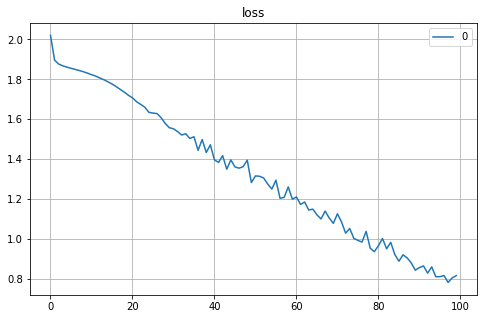

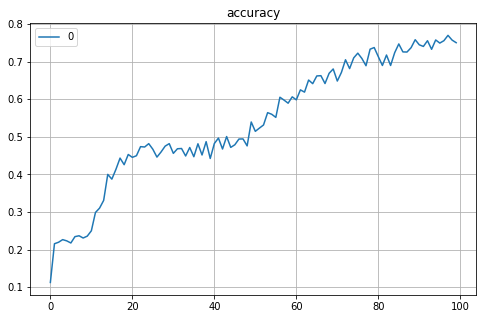

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

# Experiment with number of layers and neurons per layer to increase the performance metrics.

In [ ]:
#Increase number of layers
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='sigmoid'),
tf.keras.layers.Dense(700, activation='sigmoid'),#new layer
tf.keras.layers.Dense(256, activation='sigmoid'),
tf.keras.layers.Dense(64, activation='sigmoid'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 3s 84ms/step - loss: 1.9048 - accuracy: 0.2353
Epoch 2/100
24/24 [==============================] - 2s 84ms/step - loss: 1.6202 - accuracy: 0.3781
Epoch 3/100
24/24 [==============================] - 2s 94ms/step - loss: 1.3326 - accuracy: 0.4712
Epoch 4/100
24/24 [==============================] - 2s 84ms/step - loss: 1.1363 - accuracy: 0.5593
Epoch 5/100
24/24 [==============================] - 2s 83ms/step - loss: 0.9270 - accuracy: 0.6670
Epoch 6/100
24/24 [==============================] - 2s 83ms/step - loss: 0.7458 - accuracy: 0.7313
Epoch 7/100
24/24 [==============================] - 2s 88ms/step - loss: 0.6474 - accuracy: 0.7840
Epoch 8/100
24/24 [==============================] - 2s 85ms/step - loss: 0.5236 - accuracy: 0.8280
Epoch 9/100
24/24 [==============================] - 2s 83ms/step - loss: 0.4893 - accuracy: 0.8366
Epoch 10/100
24/24 [==============================] - 2s 83ms/step - loss: 0.3514 - accuracy: 0.8963

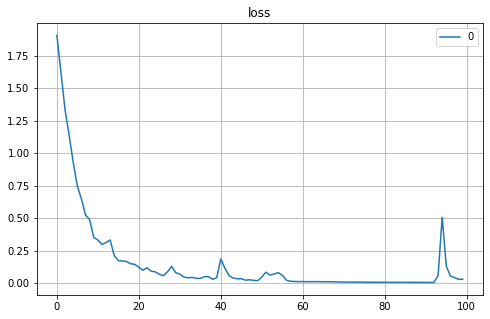

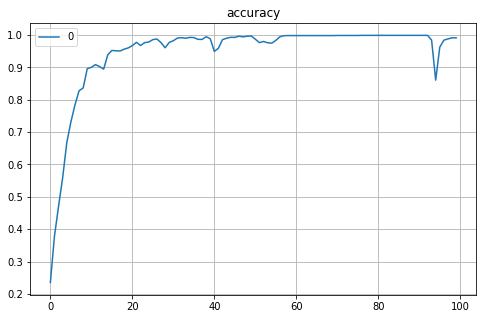

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
#Decreasing number of layers
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='sigmoid'),
tf.keras.layers.Dense(64, activation='sigmoid'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 47s 68ms/step - loss: 1.7882 - accuracy: 0.2992
Epoch 2/100
24/24 [==============================] - 2s 67ms/step - loss: 1.4655 - accuracy: 0.5255
Epoch 3/100
24/24 [==============================] - 2s 67ms/step - loss: 1.1454 - accuracy: 0.6607
Epoch 4/100
24/24 [==============================] - 2s 71ms/step - loss: 0.8833 - accuracy: 0.7442
Epoch 5/100
24/24 [==============================] - 2s 66ms/step - loss: 0.7239 - accuracy: 0.7800
Epoch 6/100
24/24 [==============================] - 2s 68ms/step - loss: 0.6062 - accuracy: 0.8181
Epoch 7/100
24/24 [==============================] - 2s 72ms/step - loss: 0.4857 - accuracy: 0.8622
Epoch 8/100
24/24 [==============================] - 2s 67ms/step - loss: 0.4132 - accuracy: 0.8814
Epoch 9/100
24/24 [==============================] - 2s 67ms/step - loss: 0.3547 - accuracy: 0.8989
Epoch 10/100
24/24 [==============================] - 2s 66ms/step - loss: 0.2871 - accuracy: 0.922

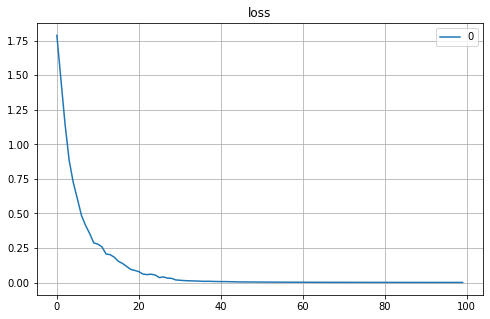

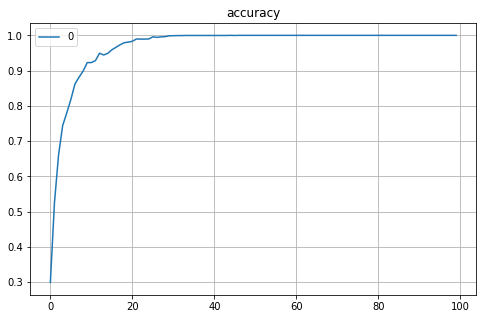

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
# On increasing number of neurons per layers
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1500, activation='sigmoid'),
tf.keras.layers.Dense(600, activation='sigmoid'),
tf.keras.layers.Dense(100, activation='sigmoid'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 3s 96ms/step - loss: 1.7984 - accuracy: 0.3323
Epoch 2/100
24/24 [==============================] - 2s 95ms/step - loss: 1.2835 - accuracy: 0.5192
Epoch 3/100
24/24 [==============================] - 2s 92ms/step - loss: 0.9294 - accuracy: 0.6696
Epoch 4/100
24/24 [==============================] - 2s 97ms/step - loss: 0.6960 - accuracy: 0.7591
Epoch 5/100
24/24 [==============================] - 2s 91ms/step - loss: 0.5590 - accuracy: 0.8105
Epoch 6/100
24/24 [==============================] - 2s 93ms/step - loss: 0.4689 - accuracy: 0.8443
Epoch 7/100
24/24 [==============================] - 2s 90ms/step - loss: 0.4066 - accuracy: 0.8625
Epoch 8/100
24/24 [==============================] - 2s 94ms/step - loss: 0.3193 - accuracy: 0.8923
Epoch 9/100
24/24 [==============================] - 2s 98ms/step - loss: 0.2447 - accuracy: 0.9208
Epoch 10/100
24/24 [==============================] - 2s 95ms/step - loss: 0.2200 - accuracy: 0.9321

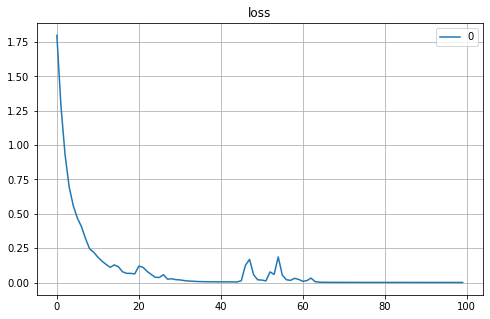

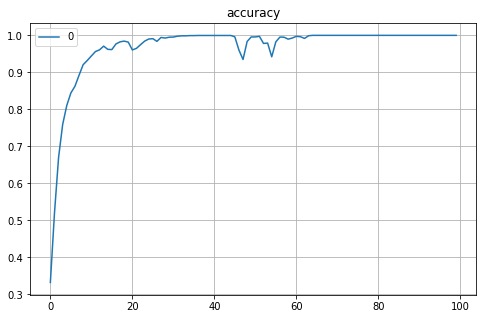

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
# On decreasing number of neurons per layers
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(500, activation='sigmoid'),
tf.keras.layers.Dense(126, activation='sigmoid'),
tf.keras.layers.Dense(30, activation='sigmoid'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 2s 72ms/step - loss: 1.8671 - accuracy: 0.2283
Epoch 2/100
24/24 [==============================] - 2s 71ms/step - loss: 1.6620 - accuracy: 0.4056
Epoch 3/100
24/24 [==============================] - 2s 72ms/step - loss: 1.3706 - accuracy: 0.5490
Epoch 4/100
24/24 [==============================] - 2s 69ms/step - loss: 1.1148 - accuracy: 0.6501
Epoch 5/100
24/24 [==============================] - 2s 74ms/step - loss: 0.9303 - accuracy: 0.7160
Epoch 6/100
24/24 [==============================] - 2s 71ms/step - loss: 0.8234 - accuracy: 0.7561
Epoch 7/100
24/24 [==============================] - 2s 70ms/step - loss: 0.7281 - accuracy: 0.7836
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 0.6210 - accuracy: 0.8178
Epoch 9/100
24/24 [==============================] - 2s 70ms/step - loss: 0.5434 - accuracy: 0.8466
Epoch 10/100
24/24 [==============================] - 2s 73ms/step - loss: 0.4686 - accuracy: 0.8708

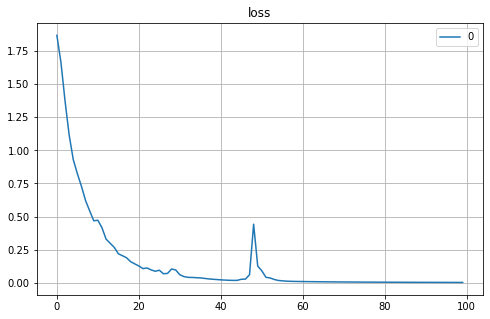

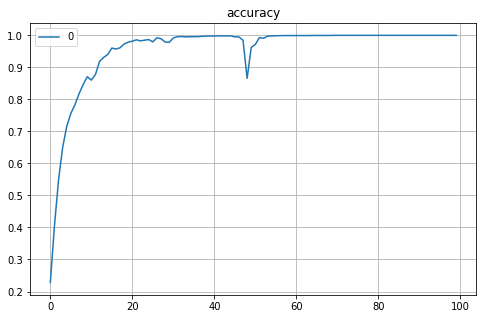

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

# Experiment with activatio functions

In [ ]:
# Using activation='tanh'
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10),padding ='same',activation='tanh'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10),padding='same', activation='tanh'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='tanh'),
tf.keras.layers.Dense(256, activation='tanh'),
tf.keras.layers.Dense(64, activation='tanh'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 14s 569ms/step - loss: 1.9720 - accuracy: 0.1988
Epoch 2/100
24/24 [==============================] - 14s 568ms/step - loss: 1.8636 - accuracy: 0.2286
Epoch 3/100
24/24 [==============================] - 14s 578ms/step - loss: 1.8461 - accuracy: 0.2545
Epoch 4/100
24/24 [==============================] - 14s 577ms/step - loss: 1.7101 - accuracy: 0.3383
Epoch 5/100
24/24 [==============================] - 14s 578ms/step - loss: 1.5256 - accuracy: 0.4076
Epoch 6/100
24/24 [==============================] - 14s 563ms/step - loss: 1.4874 - accuracy: 0.4135
Epoch 7/100
24/24 [==============================] - 13s 555ms/step - loss: 1.4901 - accuracy: 0.4036
Epoch 8/100
24/24 [==============================] - 13s 555ms/step - loss: 1.4945 - accuracy: 0.3913
Epoch 9/100
24/24 [==============================] - 13s 559ms/step - loss: 1.6180 - accuracy: 0.3675
Epoch 10/100
24/24 [==============================] - 14s 567ms/step - loss: 1.456

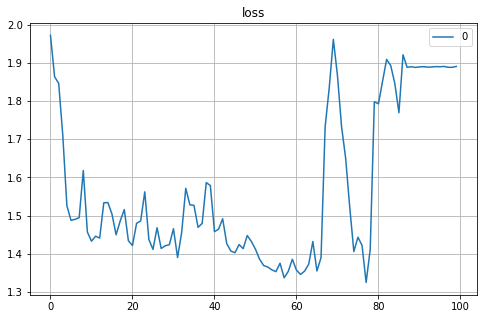

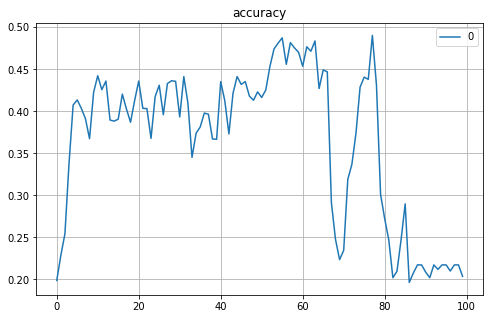

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
# Using activation='selu'
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10),padding ='same',activation='selu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10),padding='same', activation='selu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(7, activation='softmax'),
])

NameError: ignored

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


Epoch 1/100
24/24 [==============================] - 14s 549ms/step - loss: 8.1536 - accuracy: 0.1799
Epoch 2/100
24/24 [==============================] - 13s 536ms/step - loss: 1.7981 - accuracy: 0.2280
Epoch 3/100
24/24 [==============================] - 13s 538ms/step - loss: 1.6767 - accuracy: 0.3201
Epoch 4/100
24/24 [==============================] - 13s 549ms/step - loss: 1.5336 - accuracy: 0.4009
Epoch 5/100
 1/24 [>.............................] - ETA: 12s - loss: 1.4450 - accuracy: 0.4844

KeyboardInterrupt: ignored

In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
# Using activation='relu'
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10),padding ='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10),padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='selu'),
tf.keras.layers.Dense(256, activation='selu'),
tf.keras.layers.Dense(64, activation='selu'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
insurance_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = insurance_model.fit(train_images,train_labels,epochs =100,batch_size=128)


In [ ]:
for i in history.history.keys():
  pd.DataFrame(history.history[i]).plot(figsize=(8,5))
  plt.grid(True)
  plt.title(i)
  plt.show()

In [ ]:
test_labels

In [ ]:
test_images = test_images/255

In [ ]:
test_loss,test_acc = insurance_model.evalute(test_images,test_labels)
test_loss,test_acc

# Experiment with regularization techniques: Early stopping, Dropout rate, L1 for sparse model

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,monitor='val_loss', mode='min', restore_best_weights=True)


In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([

tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
opt = tf.keras.optimizers.SGD()
insurance_model.compile(optimizer=opt,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])


In [ ]:
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()

In [ ]:
#Dropout
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='relu'),
Dropout(0.5)
tf.keras.layers.Dense(256, activation='relu'),
Dropout(0.5)
tf.keras.layers.Dense(64, activation='relu'),
Dropout(0.5)
tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
opt = tf.keras.optimizers.SGD()
insurance_model.compile(optimizer=opt,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])


In [ ]:
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()

# Experiment with at least 2 more Optimizers

In [ ]:
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='sigmoid'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(256, activation='relu'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(64, activation='relu'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(7),
])

In [ ]:
insurance_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = insurance_model_12.fit(train_images, train_labels, epochs = 50, batch_size=128)


In [ ]:
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()

In [ ]:
insurance_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='sigmoid'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(256, activation='relu'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(64, activation='relu'kernel_initilalizer = "he_normal"),
tf.keras.layers.Dense(7),
])

In [ ]:
insurance_model.compile(optimizer='Adagrad',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = insurance_model_12.fit(train_images, train_labels, epochs = 50, batch_size=128)


In [ ]:
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()